In [27]:
import numpy as np
import pandas as pd  
import tensorflow as tf
from IPython.display import clear_output
clear_output() 

In [28]:
!pip install chardet


Defaulting to user installation because normal site-packages is not writeable


In [29]:
import pandas as pd


# Read the Excel file with the specified encoding
df = pd.read_excel("ENB2012_data.xlsx")


In [30]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [31]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [32]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_excel("ENB2012_data.xlsx", engine='openpyxl')

# Define a dictionary mapping the current column names to the desired names
column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

# Use the rename method to update the column names
df.rename(columns=column_mapping, inplace=True)

# Now df has the columns renamed
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
df.to_csv("energy_efficiency.csv",index = False)

In [34]:
df.columns 

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [35]:
df.isna().sum() 

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [36]:
df.describe()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

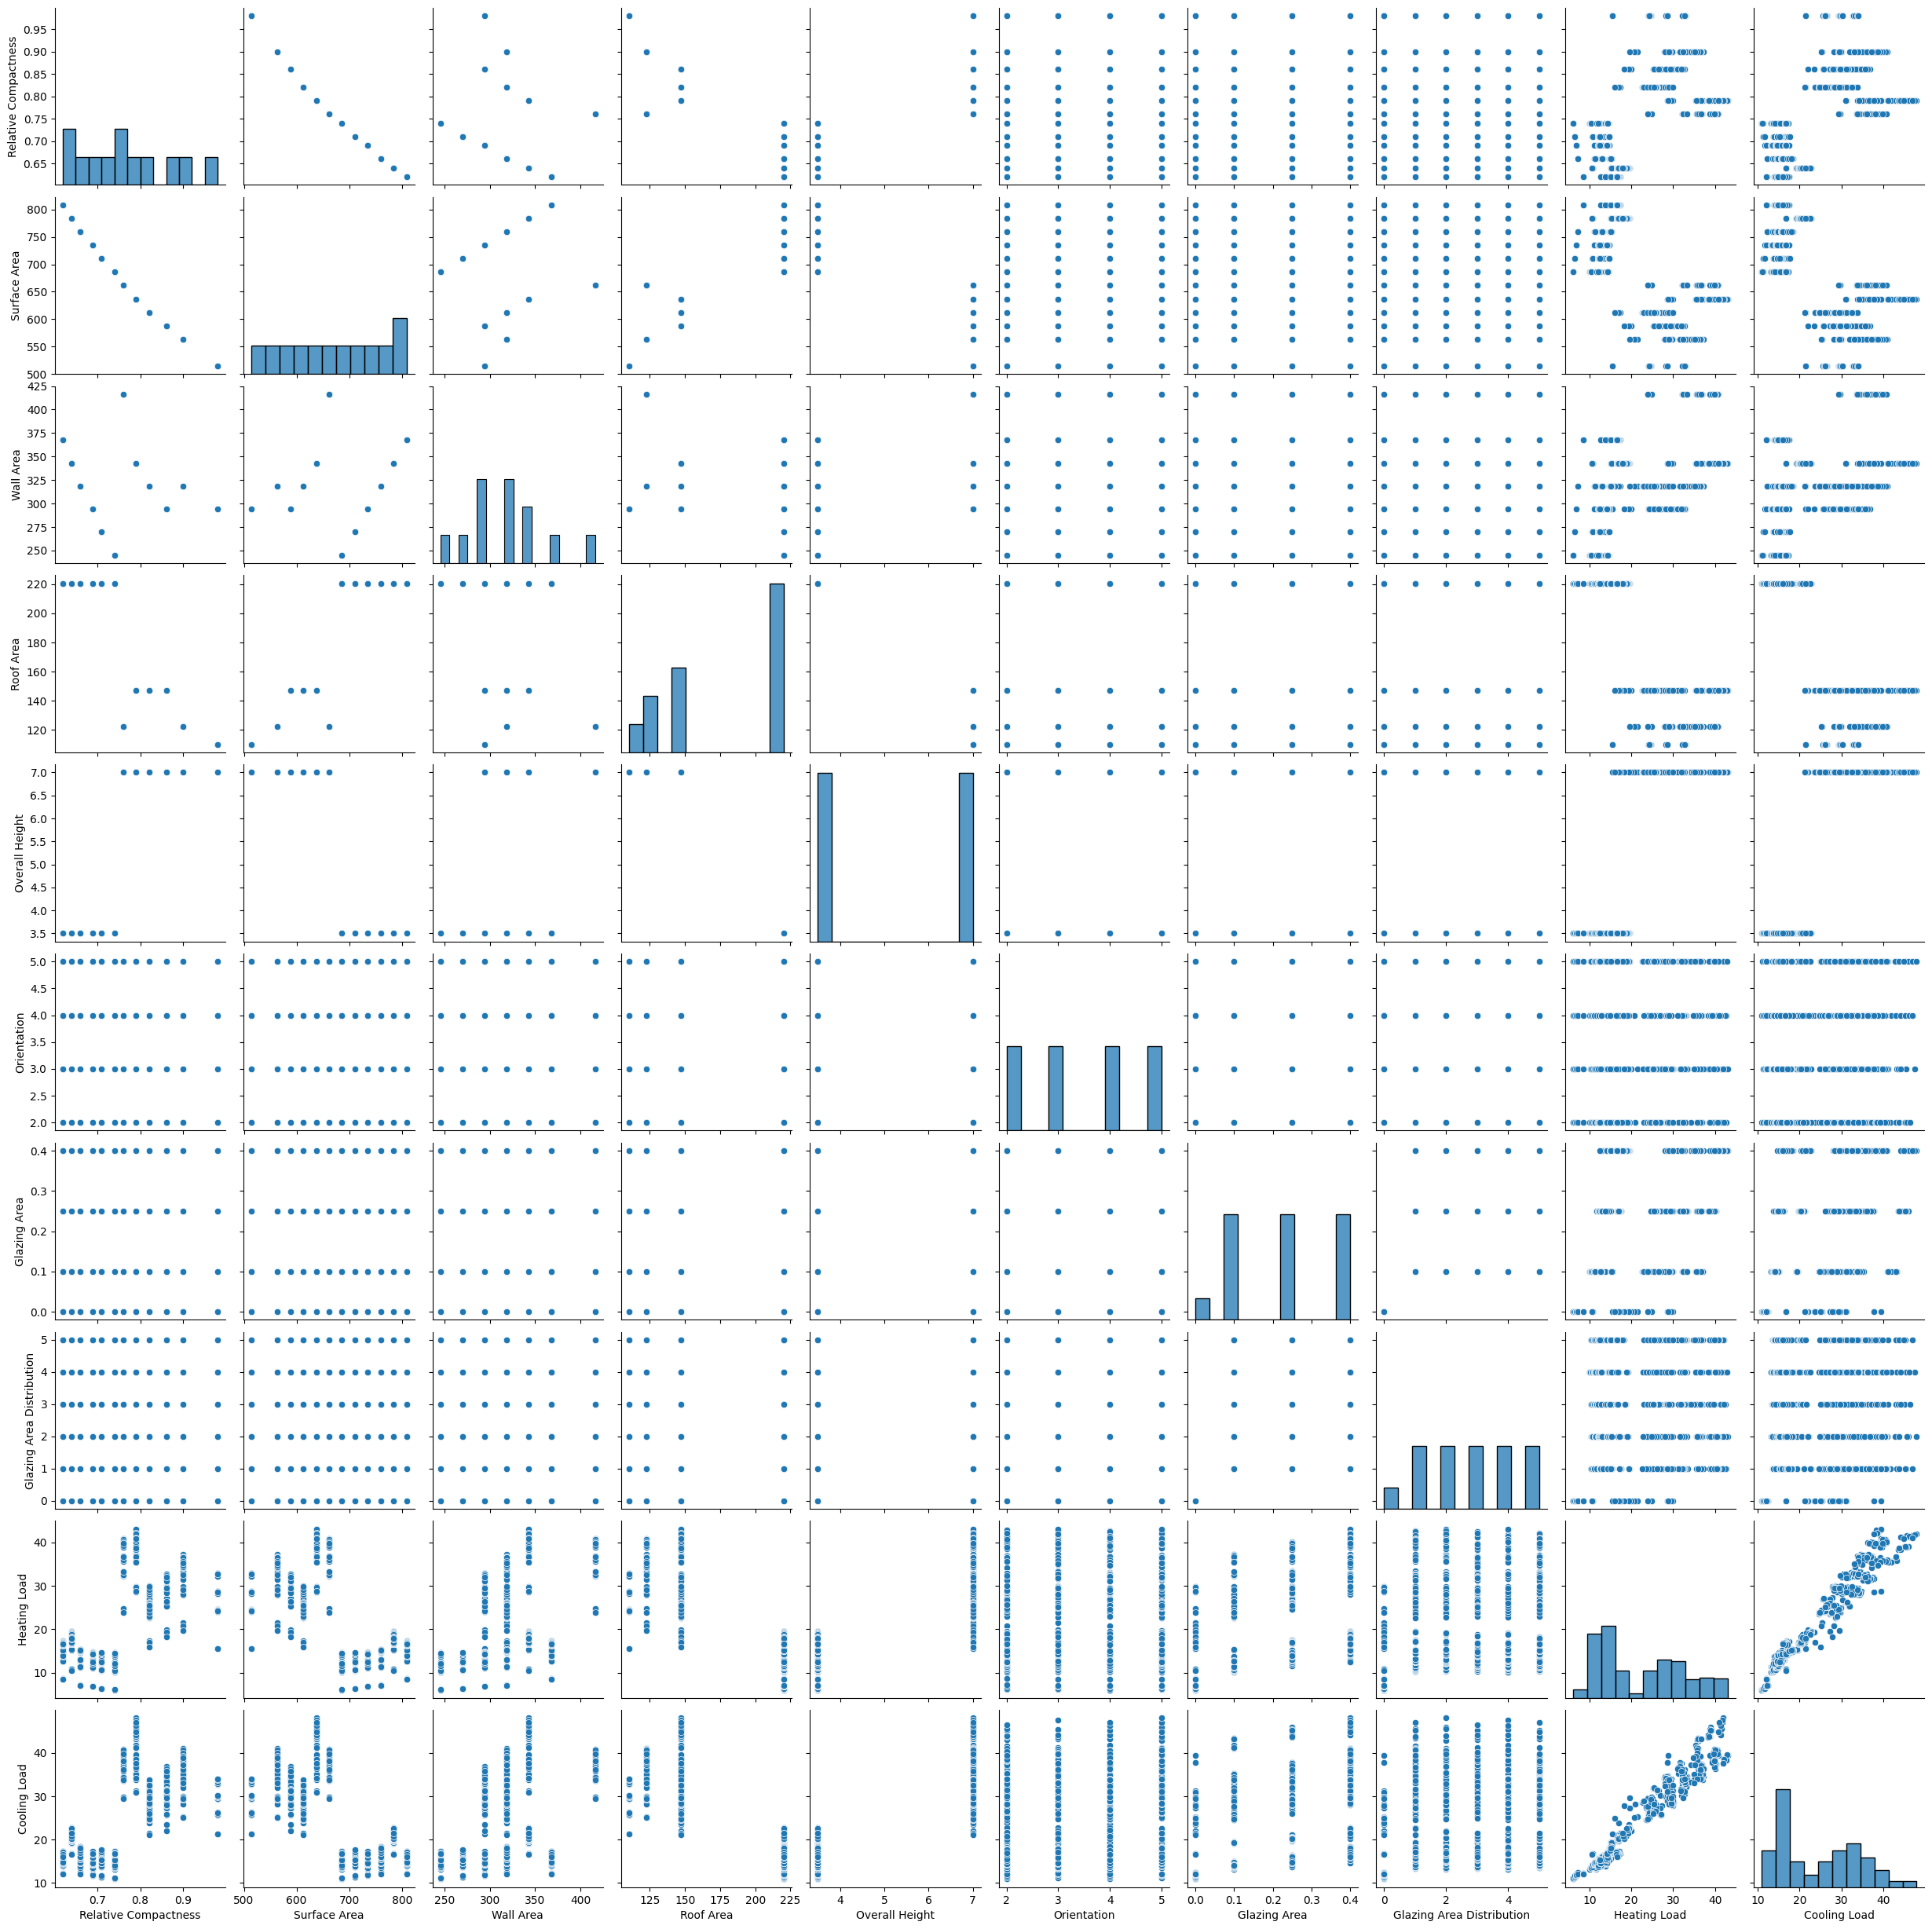

In [38]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()

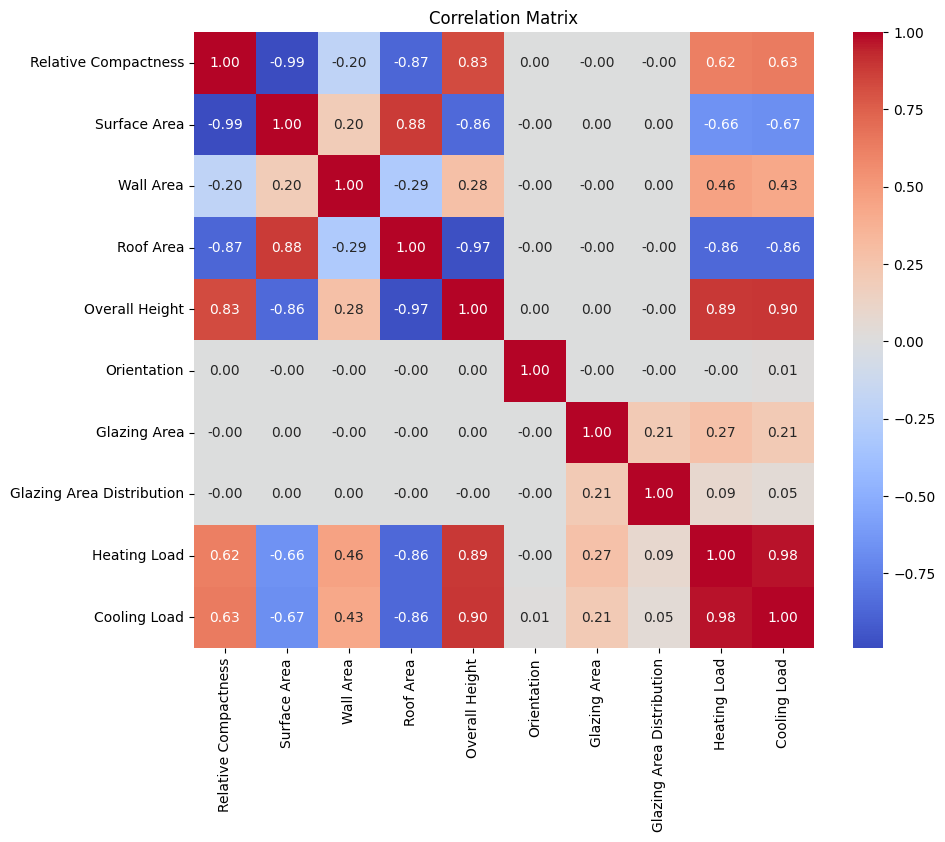

In [39]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heatmap.pdf")
plt.show() 


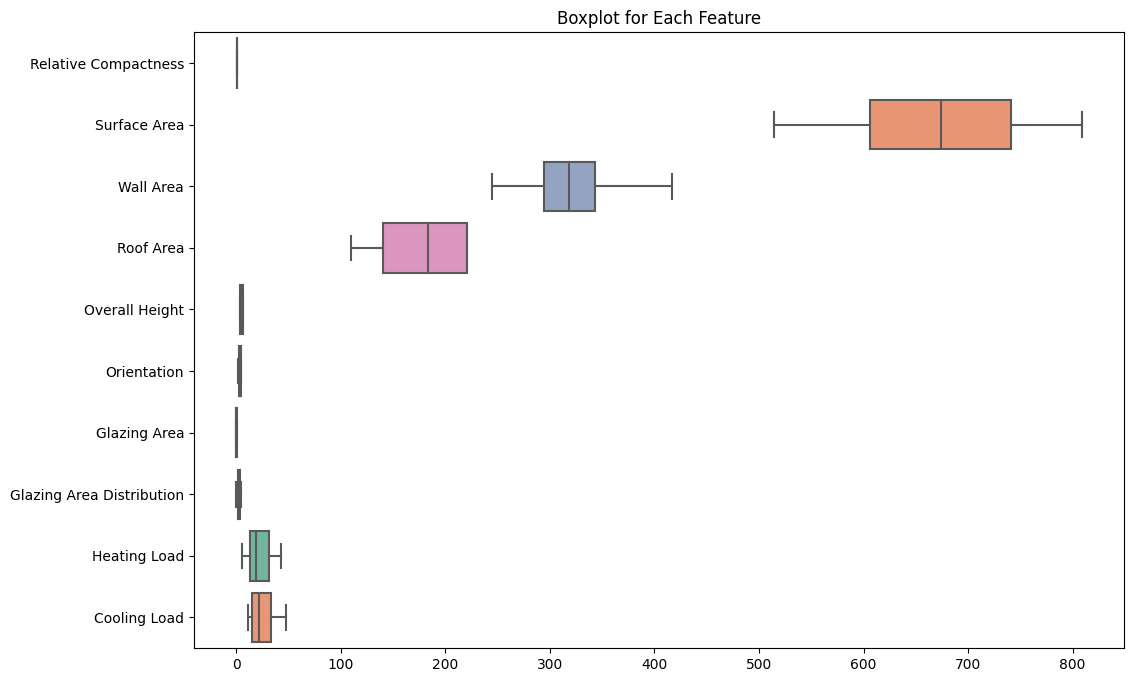

In [40]:
# Boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for Each Feature")
plt.show()

In [41]:
print("Data Types:", df.dtypes)


Data Types: Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


In [42]:
df["Glazing Area Distribution"] 

0      0
1      0
2      0
3      0
4      0
      ..
763    5
764    5
765    5
766    5
767    5
Name: Glazing Area Distribution, Length: 768, dtype: int64

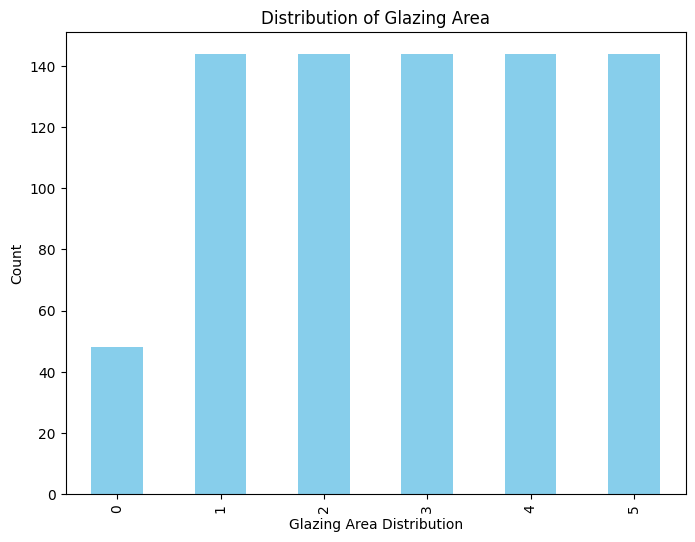

In [43]:
# Plotting the bar chart for "Glazing Area Distribution"
plt.figure(figsize=(8, 6))
df['Glazing Area Distribution'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Glazing Area')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Count')
plt.show()

# Plot the glazing area

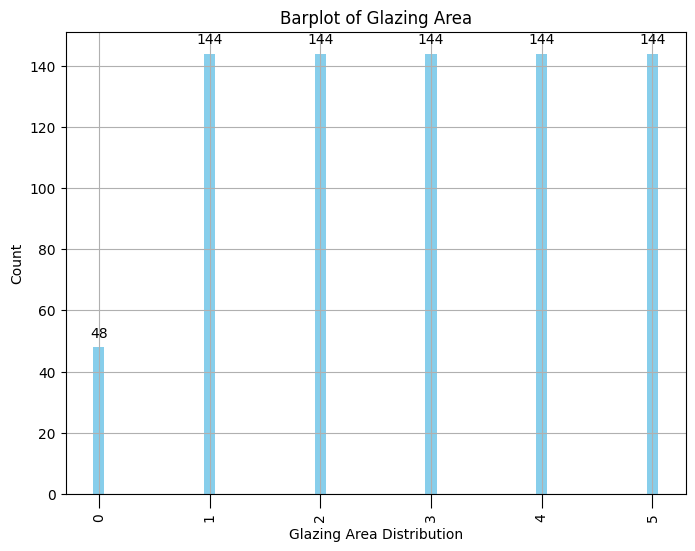

In [44]:
# Plotting the bar chart for "Glazing Area Distribution" with count labels and adjusted width
plt.figure(figsize=(8, 6))
ax = df['Glazing Area Distribution'].value_counts().sort_index().plot(kind='bar', color='skyblue', width=0.1)  # Adjust width here

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Barplot of Glazing Area')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Count')

# Set the length of x-axis ticks
plt.tick_params(axis='x', length=10)  # Adjust the length of ticks here
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/Glazing_area_barplot.pdf")
plt.show()


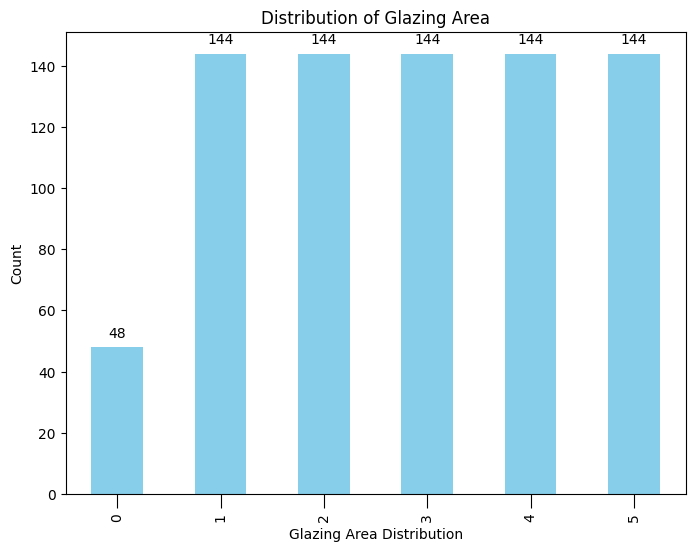

In [50]:
# Plotting the bar chart for "Glazing Area Distribution" with count labels
plt.figure(figsize=(8, 6))
ax = df['Glazing Area Distribution'].value_counts().sort_index().plot(kind='bar', color='skyblue', width=0.5)  # Adjust width here

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Glazing Area')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Count')

# Set the length of x-axis ticks
plt.tick_params(axis='x', length=10)  # Adjust the length of ticks here

plt.show()


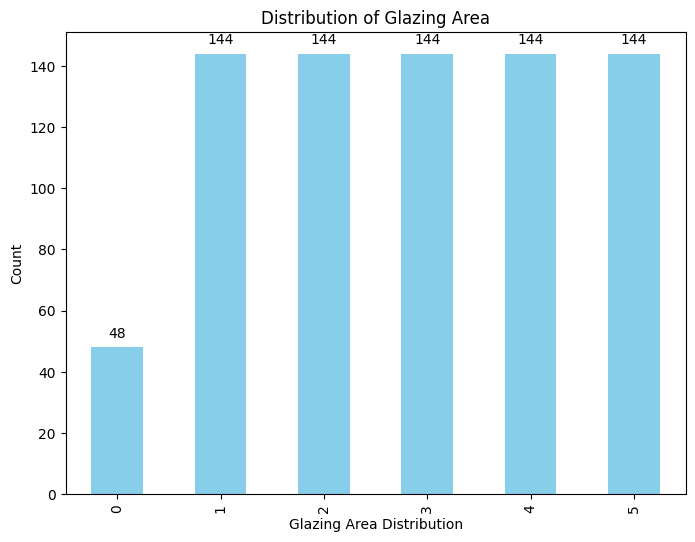

In [51]:
# Plotting the bar chart for "Glazing Area Distribution" with count labels
plt.figure(figsize=(8, 6))
ax = df['Glazing Area Distribution'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Glazing Area')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Count')
plt.show()

In [52]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [53]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named df
# Drop the target variable
X = df.drop(['Heating Load',"Cooling Load"], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)


                     Feature         VIF
0       Relative Compactness  168.948751
1               Surface Area         inf
2                  Wall Area         inf
3                  Roof Area         inf
4             Overall Height  134.035782
5                Orientation   10.796725
6               Glazing Area    4.293656
7  Glazing Area Distribution    4.496320


/home/sysadm/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [54]:
import pandas as pd

# Assuming your original DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

columns_to_remove = ["Surface Area", "Wall Area", "Roof Area"] 

# Create a new DataFrame with the desired columns
new_df = df.drop(columns=columns_to_remove)

# Display the new DataFrame
new_df


,Relative Compactness,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,7.0,2,0.0,0,15.55,21.33
1,0.98,7.0,3,0.0,0,15.55,21.33
2,0.98,7.0,4,0.0,0,15.55,21.33
3,0.98,7.0,5,0.0,0,15.55,21.33
4,0.90,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...
763,0.64,3.5,5,0.4,5,17.88,21.40
764,0.62,3.5,2,0.4,5,16.54,16.88
765,0.62,3.5,3,0.4,5,16.44,17.11
766,0.62,3.5,4,0.4,5,16.48,16.61


In [55]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named df
# Drop the target variable
X = new_df.drop(['Heating Load',"Cooling Load"], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)


                     Feature        VIF
0       Relative Compactness  43.899227
1             Overall Height  22.465331
2                Orientation   9.704425
3               Glazing Area   4.206020
4  Glazing Area Distribution   4.395567


In [56]:
df 

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


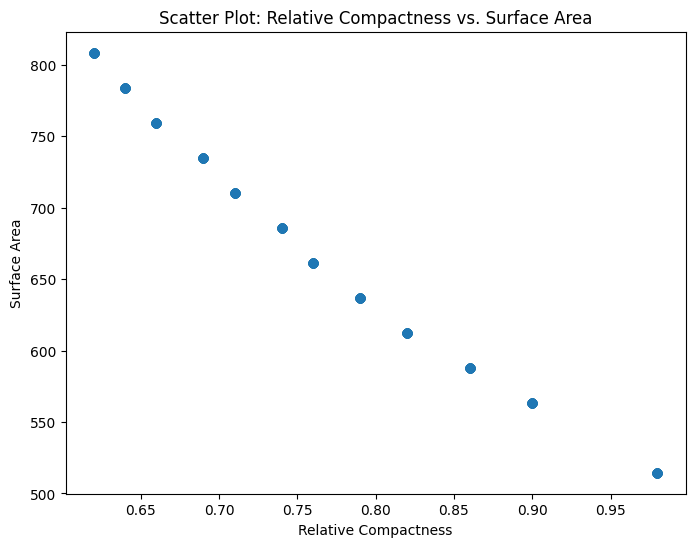

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with columns 'Relative Compactness' and 'Surface Area'
# Replace 'Relative Compactness' and 'Surface Area' with the actual column names in your dataset

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(df["Relative Compactness"], df["Surface Area"])
plt.xlabel("Relative Compactness")
plt.ylabel("Surface Area")
plt.title("Scatter Plot: Relative Compactness vs. Surface Area")
#plt.grid(True) 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/scatter_plot_relative_compactness_surface_area.png")
plt.show()


In [58]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your actual DataFrame

# Selecting the first two columns for pivot table
pivot_df = df[['Relative Compactness', 'Surface Area']]

# Creating a pivot table
pivot_table = pivot_df.pivot_table(index='Relative Compactness', columns='Surface Area', aggfunc=len, fill_value=0)

print(pivot_table)


Surface Area          514.5  563.5  588.0  612.5  637.0  661.5  686.0  710.5  \
Relative Compactness                                                           
0.62                      0      0      0      0      0      0      0      0   
0.64                      0      0      0      0      0      0      0      0   
0.66                      0      0      0      0      0      0      0      0   
0.69                      0      0      0      0      0      0      0      0   
0.71                      0      0      0      0      0      0      0     64   
0.74                      0      0      0      0      0      0     64      0   
0.76                      0      0      0      0      0     64      0      0   
0.79                      0      0      0      0     64      0      0      0   
0.82                      0      0      0     64      0      0      0      0   
0.86                      0      0     64      0      0      0      0      0   
0.90                      0     64      

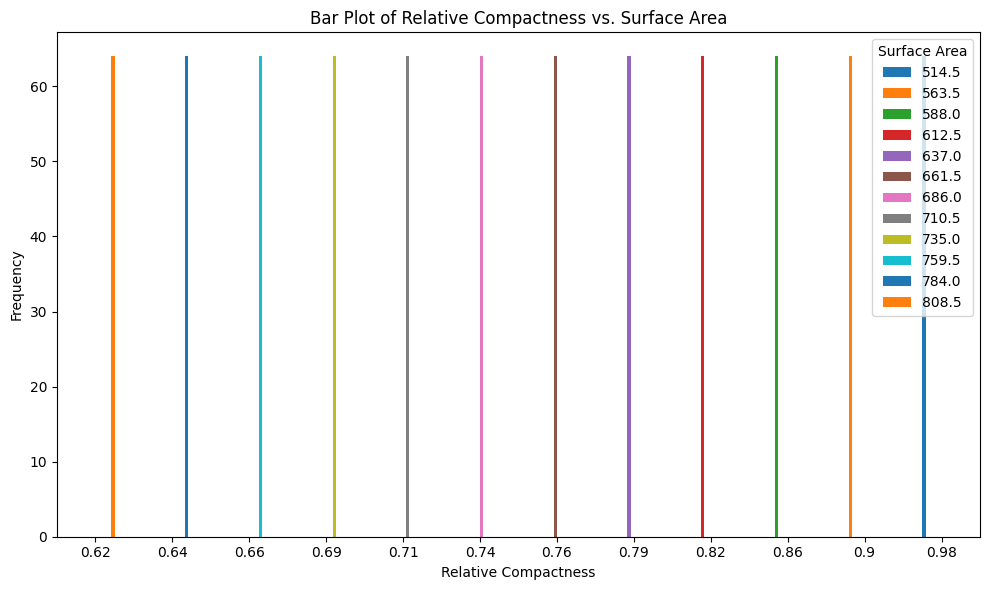

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pivot_table is your generated pivot table
# Replace 'pivot_table' with the actual name of your pivot table

# Creating a bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot of Relative Compactness vs. Surface Area')
plt.xlabel('Relative Compactness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Surface Area')
plt.tight_layout()
plt.show()


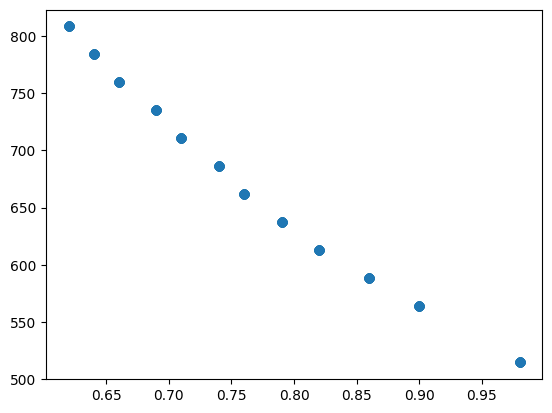

In [60]:
plt.scatter(df["Relative Compactness"],df["Surface Area"])

In [61]:
df["Relative Compactness"].corr(df["Surface Area"])

-0.9919014616138878

# barplot of orientation

In [62]:
df["Orientation"]

0      2
1      3
2      4
3      5
4      2
      ..
763    5
764    2
765    3
766    4
767    5
Name: Orientation, Length: 768, dtype: int64

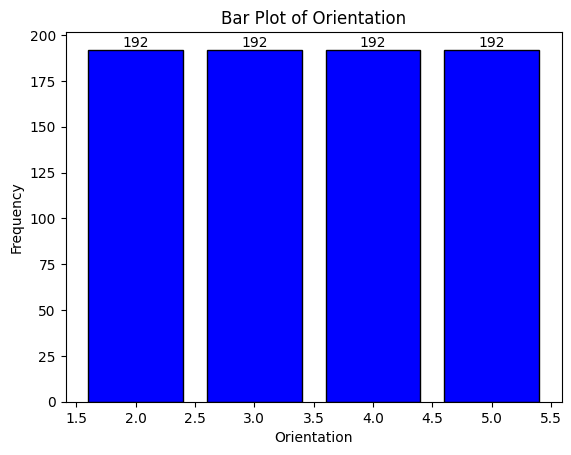

In [63]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Orientation" is the column you want to plot
orientation_counts = df["Orientation"].value_counts()

plt.bar(orientation_counts.index, orientation_counts.values, color='blue', edgecolor='black')

plt.title('Bar Plot of Orientation')
plt.xlabel('Orientation')
plt.ylabel('Frequency')

# Adding count values on top of each bar
for i, count in enumerate(orientation_counts.values):
    plt.text(orientation_counts.index[i], count + 0.1, str(count), ha='center', va='bottom')

plt.show()


In [64]:
unique_values = df["Roof Area"].unique()
print(unique_values)


[110.25 122.5  147.   220.5 ]


# barplot of roof area

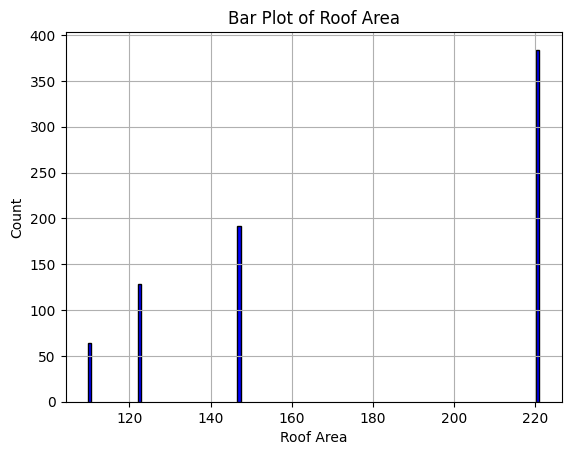

In [65]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Roof Area" is the column you're interested in
value_counts = df["Roof Area"].value_counts()

# Plotting a bar plot
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')

plt.title('Bar Plot of Roof Area')
plt.xlabel('Roof Area')
plt.ylabel('Count')
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/roof_area.pdf")
plt.show()


In [66]:
# pie chart======================

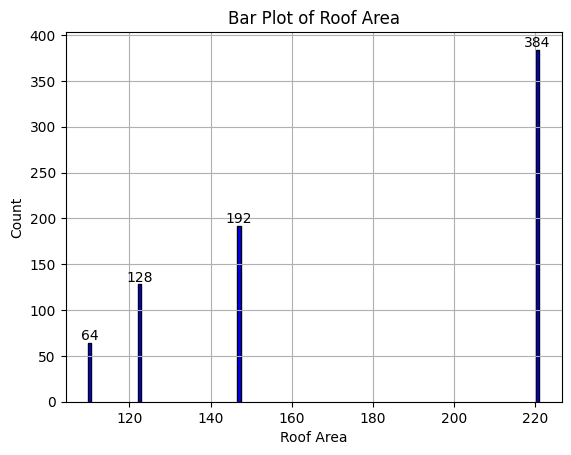

In [67]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Roof Area" is the column you're interested in
value_counts = df["Roof Area"].value_counts()

# Plotting a bar plot
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')

# Add count annotations to the bars
for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count + 0.1, str(count), ha='center', va='bottom')

plt.title('Bar Plot of Roof Area')
plt.xlabel('Roof Area')
plt.ylabel('Count')
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/roof_are_barplt_count.pdf")
plt.show()


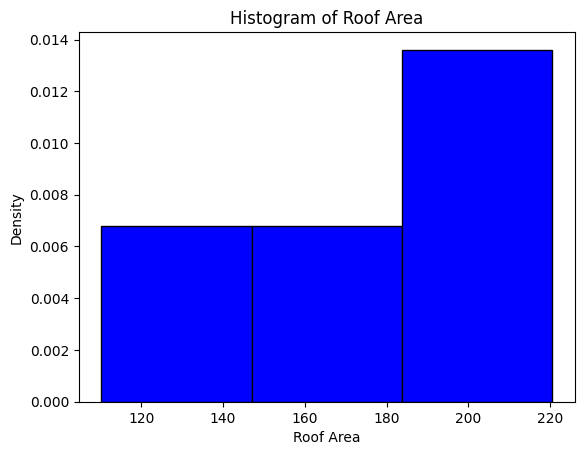

In [68]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df["Roof Area"], bins=3, color='blue', edgecolor='black', density=True)

plt.title('Histogram of Roof Area')
plt.xlabel('Roof Area')
plt.ylabel('Density')

plt.show()


# Barplot of Wall Area	

In [69]:
unique_values = df["Wall Area"].unique()
print(unique_values)


[294.  318.5 343.  416.5 245.  269.5 367.5]


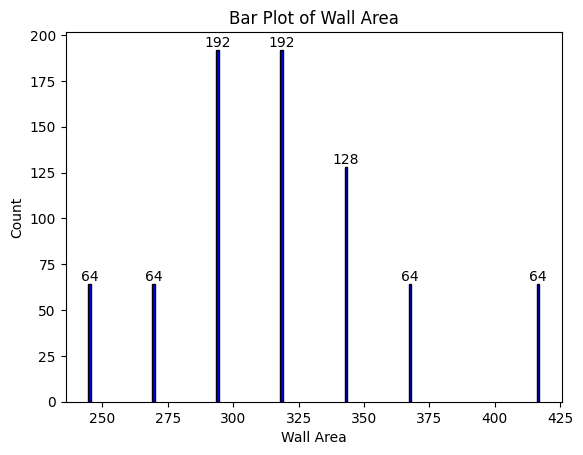

In [70]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Wall Area" is the column you're interested in
value_counts = df["Wall Area"].value_counts()

# Plotting a bar plot
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black',width = 0.9)

# Add count annotations to the bars
for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count + 0.1, str(count), ha='center', va='bottom')

plt.title('Bar Plot of Wall Area')
plt.xlabel('Wall Area')
plt.ylabel('Count')
#plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/wall_area.pdf")
plt.show()


# Plot of relative compactness

In [71]:
unique_values = df["Relative Compactness"].unique()
print(unique_values)


[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]


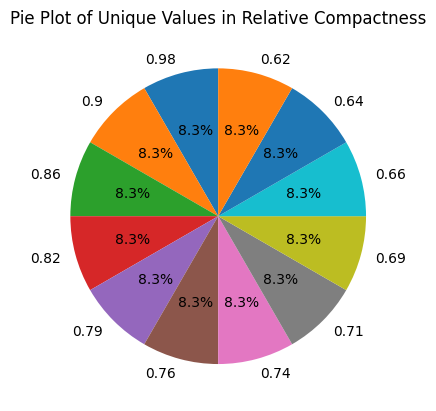

In [72]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Relative Compactness" is the column you're interested in
unique_values = df["Relative Compactness"].value_counts()

# Plotting a pie plot
plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%', startangle=90)

plt.title('Pie Plot of Unique Values in Relative Compactness')

plt.show()


# Plot of surface area

In [73]:
unique_values = df["Surface Area"].unique()
print(unique_values) 

[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]


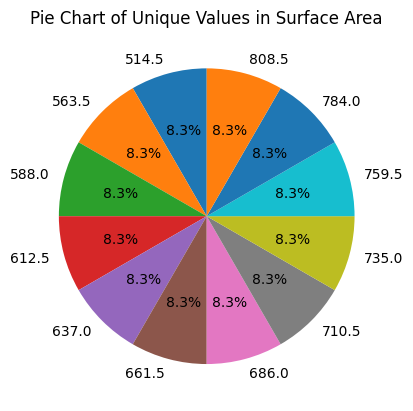

In [74]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Surface Area" is the column you're interested in
unique_values = df["Surface Area"].value_counts()

# Plotting a pie chart
plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%', startangle=90)

plt.title('Pie Chart of Unique Values in Surface Area')

plt.show() 

# Plot of Roof Area	

In [75]:
unique_values = df["Roof Area"].unique()
print(unique_values)

[110.25 122.5  147.   220.5 ]


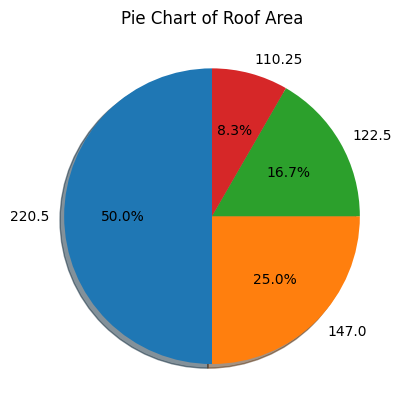

In [76]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Roof Area" is the column you're interested in
unique_values = df["Roof Area"].value_counts()

# Plotting a pie chart
plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%', startangle=90,shadow = True)

plt.title('Pie Chart of Roof Area')
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/roof_area_pie.pdf")
plt.show()


# plot of heating load

In [77]:
unique_values = df["Heating Load"].unique()
print(unique_values) 

[15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37
 25.27  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96
 32.12  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42
 15.21  12.96  12.97  12.93  13.02  24.29  24.31  24.13  24.25  28.88
 29.68  28.83  27.9   26.48  27.02  26.33  25.36  23.75  24.23  23.67
 22.79  35.65  37.26  36.97  36.03  33.16  32.4   33.12  32.41  10.42
 10.46  10.32  10.45  10.64  10.72  10.55  10.68  11.45  11.46  11.32
 11.49  11.42  11.33  11.43  15.18  15.34  15.19  12.88  13.    13.04
 24.28  24.4   24.11  24.35  28.07  29.01  29.62  29.05  25.41  26.47
 26.89  26.46  22.93 

In [78]:
np.min(df["Heating Load"])

6.01

In [79]:
np.max(df["Heating Load"]) 

43.1

In [80]:
from scipy.stats import mode


In [81]:
mode(df["Heating Load"])

ModeResult(mode=15.16, count=6)

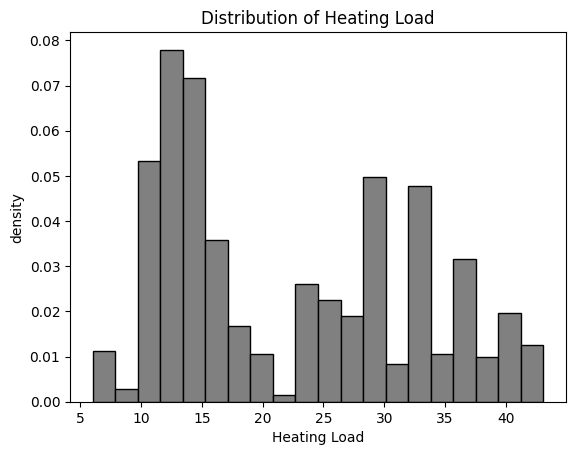

In [82]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Heating Load" is the column you're interested in
plt.hist(df["Heating Load"], bins=20, color='gray', edgecolor='black',density = True)

plt.title('Distribution of Heating Load')
plt.xlabel('Heating Load')
plt.ylabel('density')
#plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load.pdf")
plt.show()


In [83]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Plot of Cooling Load

In [84]:
np.min(df["Cooling Load"])

10.9

In [85]:
np.max(df["Cooling Load"])

48.03

In [86]:
48.03-43.1

4.93

In [87]:
10.9-6.01 

4.890000000000001

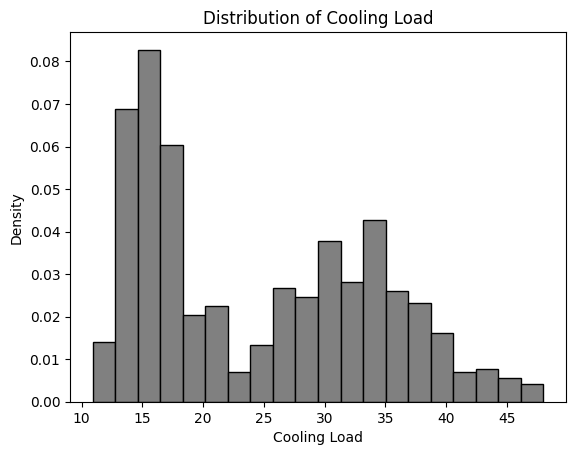

In [88]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Cooling Load" is the column you're interested in
plt.hist(df["Cooling Load"], bins=20, color='gray', edgecolor='black', density=True)

plt.title('Distribution of Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Density')
#plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_load.pdf")
plt.show()


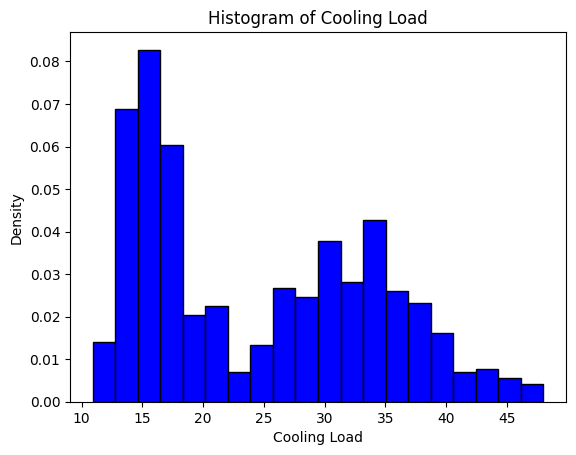

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Assuming df is your DataFrame and "Cooling Load" is the column you're interested in
data = df["Cooling Load"].dropna()

# Plotting the histogram
plt.hist(data, bins=20, color='blue', edgecolor='black', density=True)
plt.title('Histogram of Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Density')

# Finding the mode 
mode_value = mode(data)

plt.show()


# plot the overall height

In [90]:
df["Overall Height"]

0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
763    3.5
764    3.5
765    3.5
766    3.5
767    3.5
Name: Overall Height, Length: 768, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

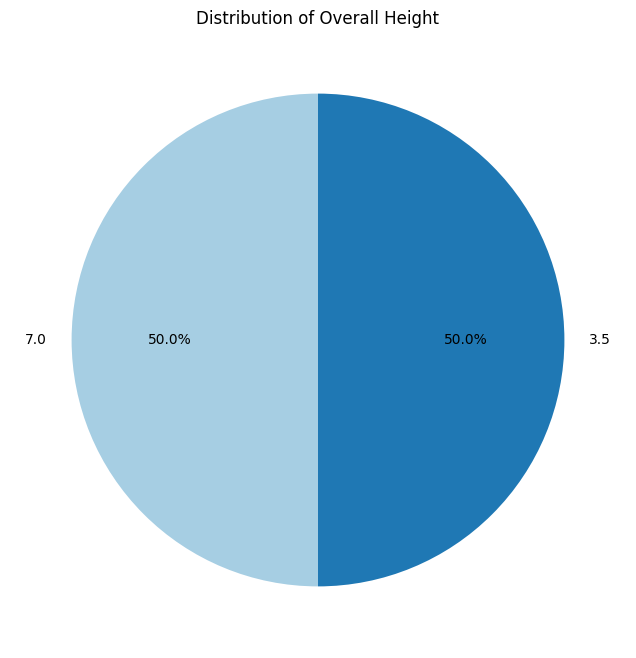

In [91]:
# Count the occurrences of each 'Overall Height' value
height_counts = df['Overall Height'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(height_counts, labels=height_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Overall Height')
plt.show

In [92]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Mean heat load based on height

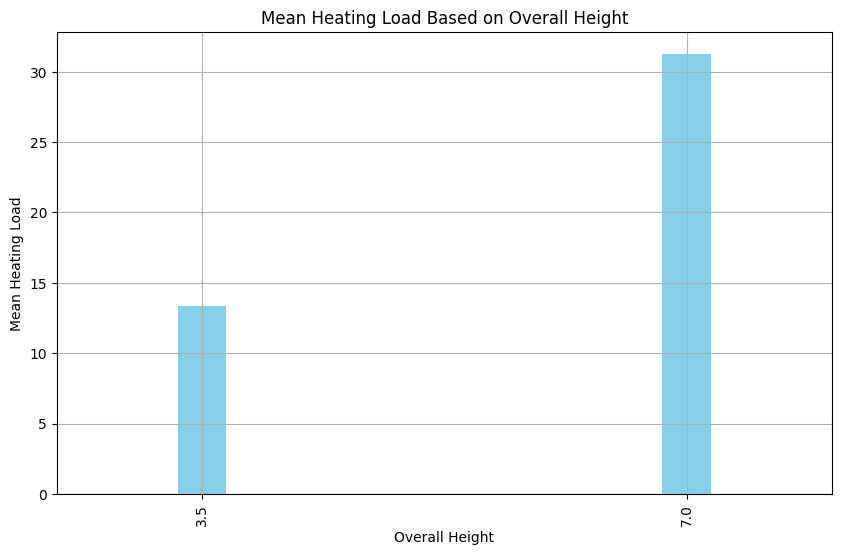

In [93]:
# Group by 'Overall Height' and calculate the mean Heating Load for each group
height_grouped = df.groupby('Overall Height')['Heating Load'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
height_grouped.plot(kind='bar', color='skyblue',width = 0.1)
plt.title('Mean Heating Load Based on Overall Height')
plt.xlabel('Overall Height')
plt.ylabel('Mean Heating Load')
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_based_on_height.pdf")
plt.show()

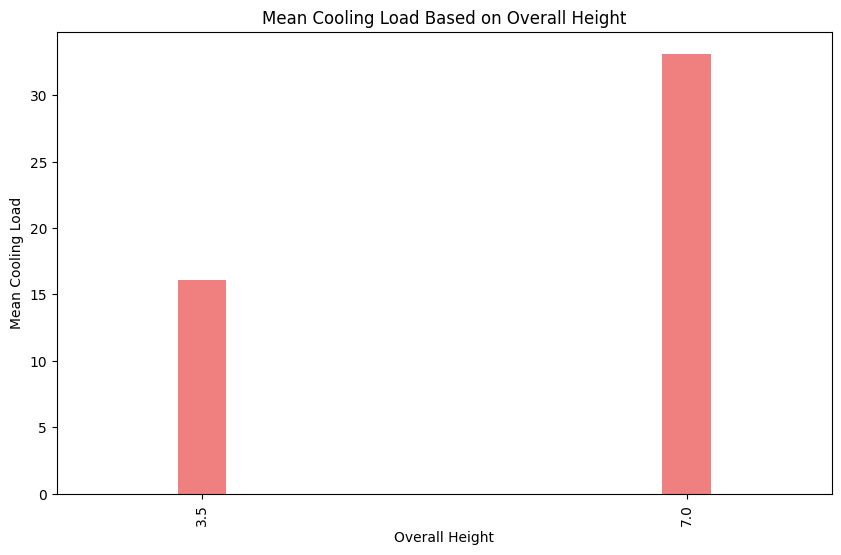

In [94]:
# Group by 'Overall Height' and calculate the mean Cooling Load for each group
height_grouped_cooling = df.groupby('Overall Height')['Cooling Load'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
height_grouped_cooling.plot(kind='bar', color='lightcoral',width = 0.1)
plt.title('Mean Cooling Load Based on Overall Height')
plt.xlabel('Overall Height')
plt.ylabel('Mean Cooling Load') 
plt.grid
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_load_based_height.pdf")
plt.show()


# Based on roof area mean heating load

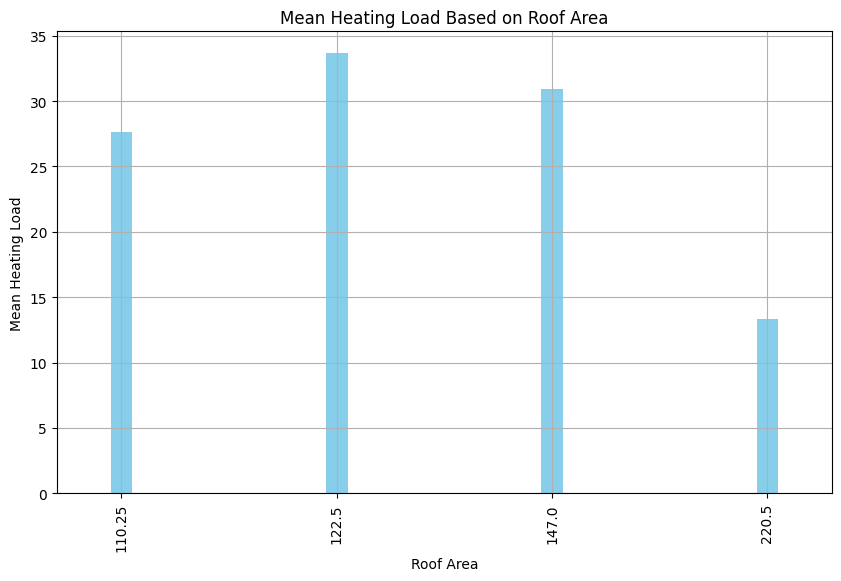

In [95]:
# Group by 'Roof Area' and calculate the mean Heating Load for each group
roof_area_grouped = df.groupby('Roof Area')['Heating Load'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
roof_area_grouped.plot(kind='bar', color='skyblue',width = 0.1)
plt.title('Mean Heating Load Based on Roof Area')
plt.xlabel('Roof Area')
plt.ylabel('Mean Heating Load')
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_based_on_roof_area.pdf")
plt.show()


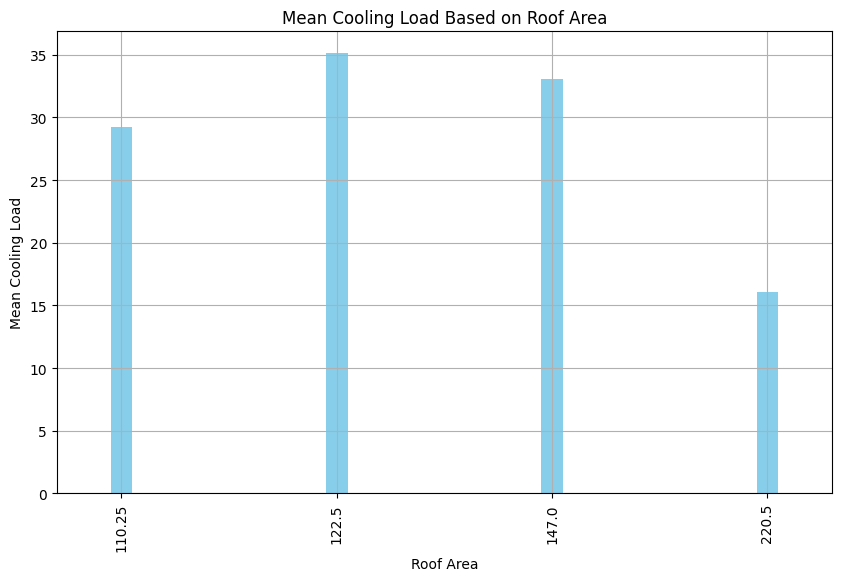

In [96]:
# Group by 'Roof Area' and calculate the mean Heating Load for each group
roof_area_grouped = df.groupby('Roof Area')['Cooling Load'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
roof_area_grouped.plot(kind='bar', color='skyblue',width = 0.1)
plt.title('Mean Cooling Load Based on Roof Area')
plt.xlabel('Roof Area')
plt.ylabel('Mean Cooling Load') 
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_load_based_area.pdf")
plt.show()


In [97]:
data = df

<Figure size 1000x600 with 0 Axes>

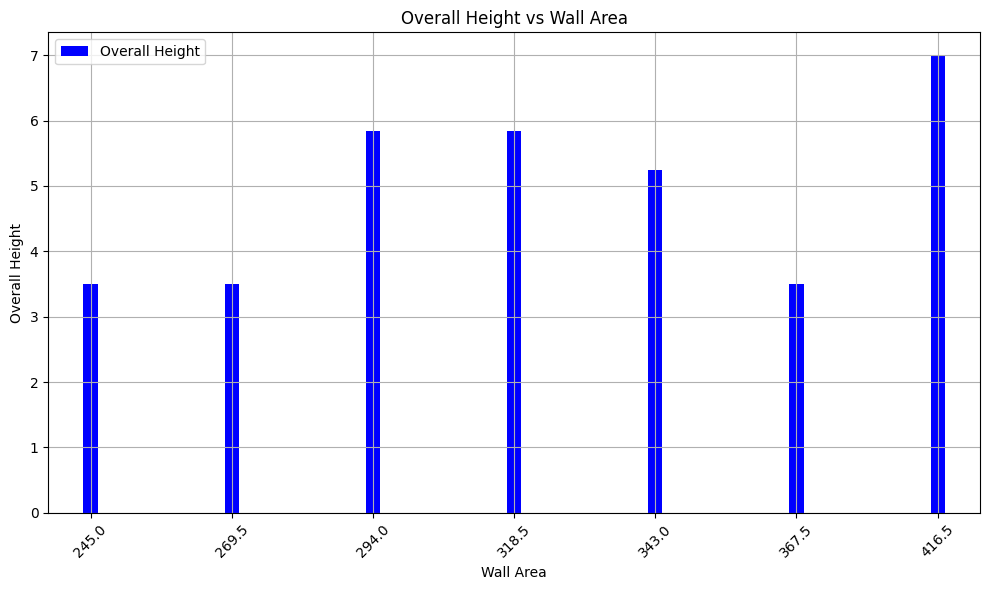

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Overall Height', index='Wall Area')

# Plotting Overall Height vs Wall Area using bar plot
plt.figure(figsize=(10, 6))

# Bar plot
pivot_table.plot(kind='bar', figsize=(10, 6), width=0.1, color='blue')

plt.xlabel('Wall Area')
plt.ylabel('Overall Height')
plt.title('Overall Height vs Wall Area')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Save and display the plot
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/overall_height_wall_area.pdf")
plt.show()


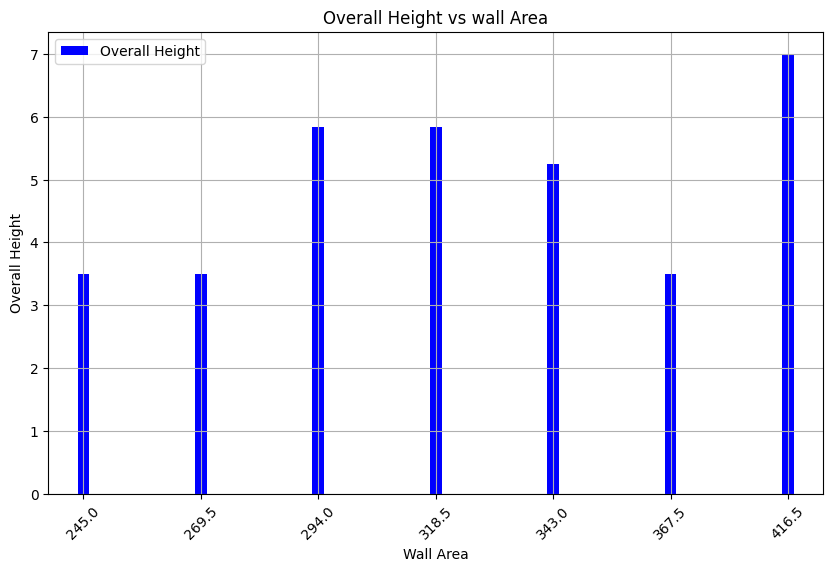

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Overall Height', index='Wall Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6),width = 0.1,color = "Blue")
plt.xlabel('Wall Area')
plt.ylabel('Overall Height')
plt.title('Overall Height vs wall Area')
plt.xticks(rotation=45) 
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/overall_height_wall_area.pdf")
plt.show() 


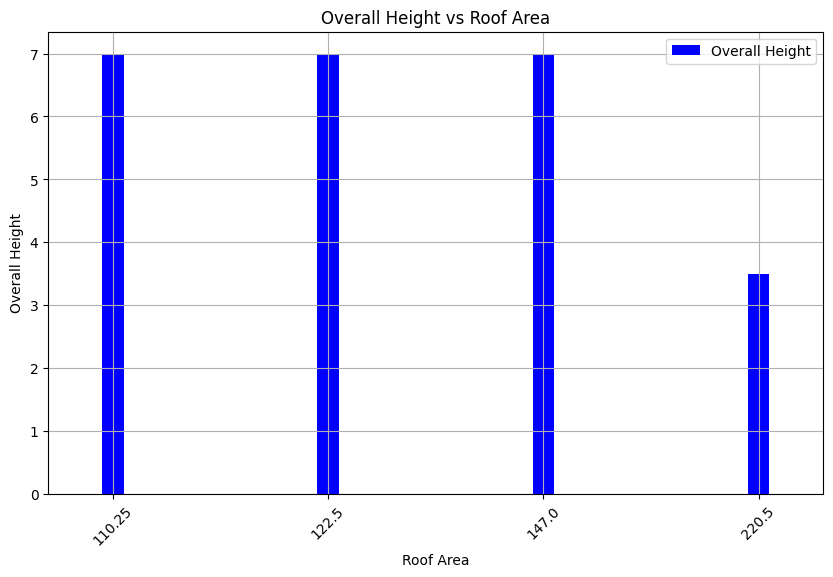

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Overall Height', index='Roof Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6),width = 0.1,color = "Blue")
plt.xlabel('Roof Area')
plt.ylabel('Overall Height')
plt.title('Overall Height vs Roof Area')
plt.xticks(rotation=45) 
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/overall_height_roof_area.pdf")
plt.show() 


<Figure size 1000x600 with 0 Axes>

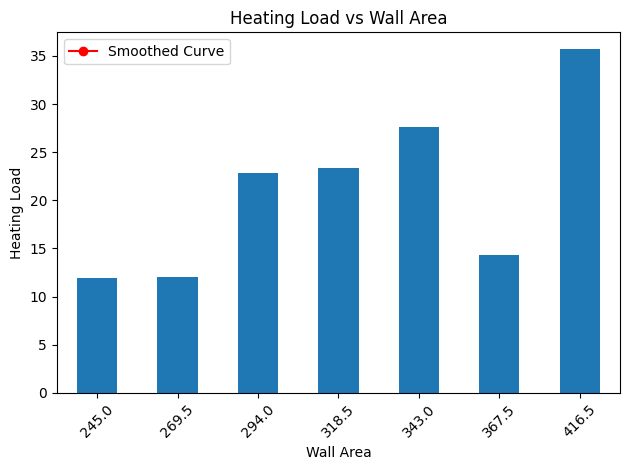

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Heating Load', index='Wall Area')

# Plotting Heating Load vs Wall Area using bar plot
plt.figure(figsize=(10, 6))

# Bar plot
pivot_table.plot(kind='bar', width=0.5, legend=None)

# Smooth curve joining the points using a line plot
smooth_values = pivot_table['Heating Load'].rolling(window=3).mean()  # Using rolling mean for smoothing
plt.plot(smooth_values, marker='o', linestyle='-', color='red')

plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs Wall Area')
plt.xticks(rotation=45)
plt.legend(['Smoothed Curve'])

plt.tight_layout()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_wall_area_smoothed.pdf")
plt.show()


<Figure size 1000x600 with 0 Axes>

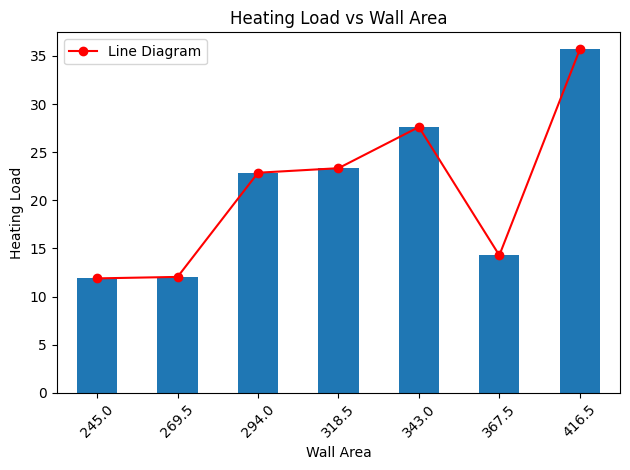

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Heating Load', index='Wall Area')

# Plotting Heating Load vs Wall Area using bar plot
plt.figure(figsize=(10, 6))

# Bar plot
bar_plot = pivot_table.plot(kind='bar', width=0.5, legend=None)

# Retrieve bar heights
bar_heights = [bar.get_height() for bar in bar_plot.patches]

# Get x-axis positions for each bar
x_positions = np.arange(len(pivot_table))

# Plot a line joining the top of each bar
plt.plot(x_positions, bar_heights, marker='o', linestyle='-', color='red')

plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs Wall Area')
plt.xticks(rotation=45)
plt.legend(['Line Diagram'])

plt.tight_layout()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_wall_area_line_diagram.pdf")
plt.show()


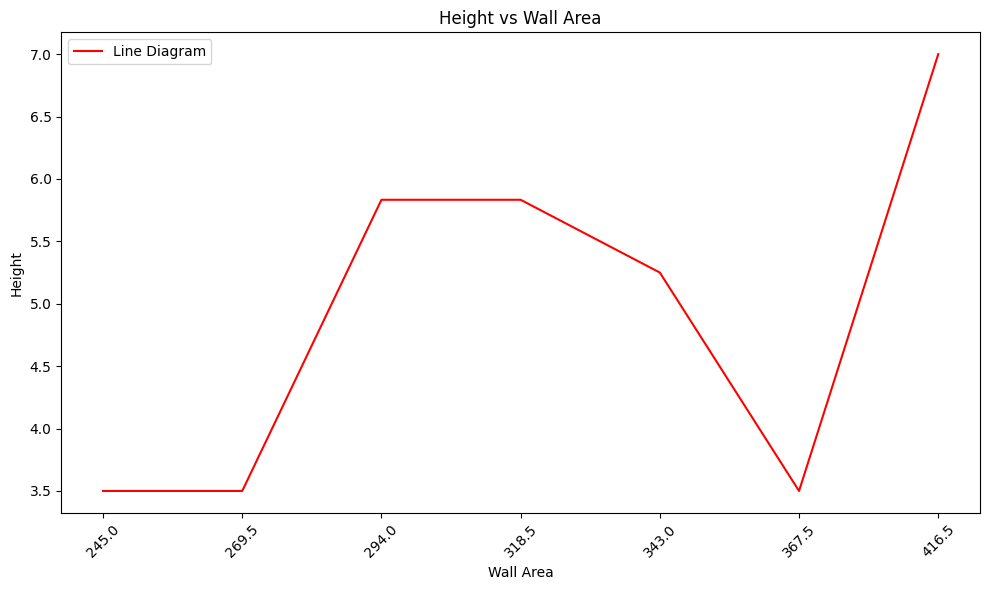

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Overall Height', index='Wall Area')

# Get bar heights and their corresponding x positions
bar_heights = pivot_table['Overall Height'].values
x_positions = np.arange(len(pivot_table))

# Plotting only the line diagram
plt.figure(figsize=(10, 6))

# Plot a line joining the top of each bar
plt.plot(x_positions, bar_heights, linestyle='-', color='red')

plt.xlabel('Wall Area')
plt.ylabel('Height')
plt.title('Height vs Wall Area')
plt.xticks(x_positions, pivot_table.index, rotation=45)
plt.legend(['Line Diagram'])

plt.tight_layout()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/height_wall_area_line_diagram.pdf")
plt.show()


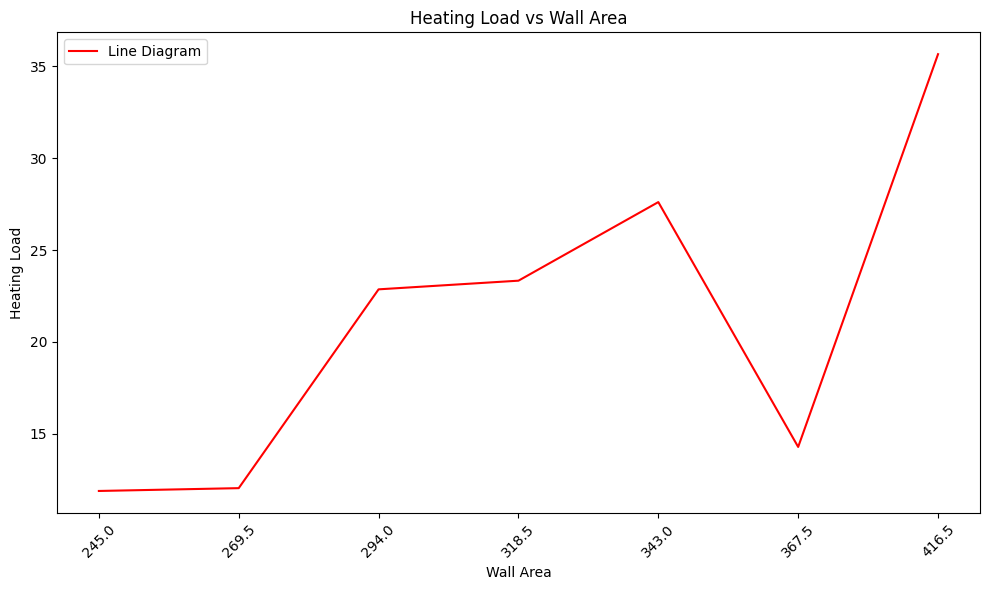

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Heating Load', index='Wall Area')

# Get bar heights and their corresponding x positions
bar_heights = pivot_table['Heating Load'].values
x_positions = np.arange(len(pivot_table))

# Plotting only the line diagram
plt.figure(figsize=(10, 6))

# Plot a line joining the top of each bar
plt.plot(x_positions, bar_heights, linestyle='-', color='red')

plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs Wall Area')
plt.xticks(x_positions, pivot_table.index, rotation=45)
plt.legend(['Line Diagram'])

plt.tight_layout()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_wall_area_line_diagram.pdf")
plt.show()


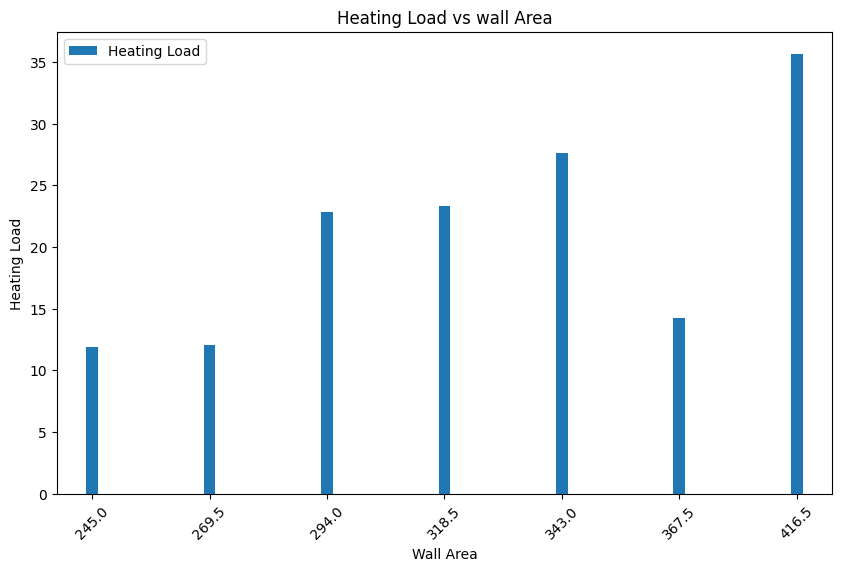

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Heating Load', index='Wall Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6),width = 0.1)
plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs wall Area')
plt.xticks(rotation=45) 
#plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_load_wall_area.pdf")

plt.show() 


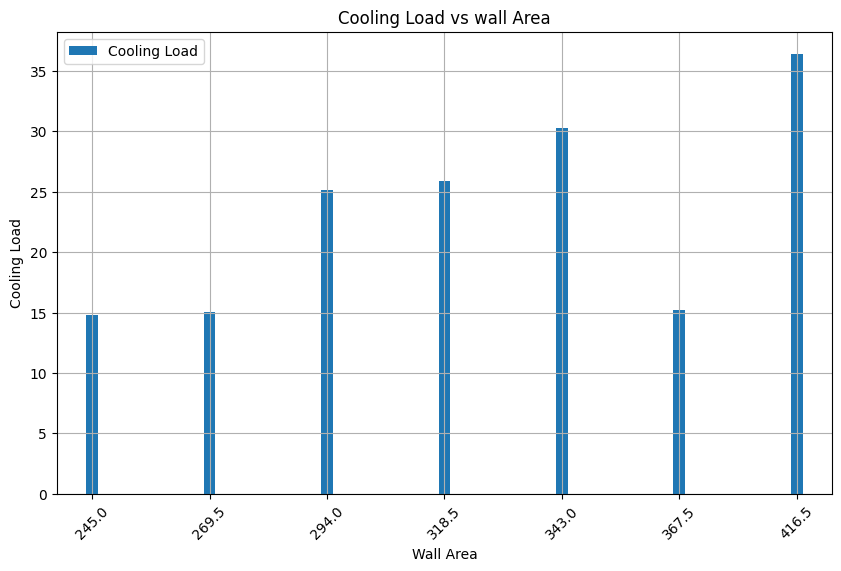

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Cooling Load', index='Wall Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6),width = 0.1)
plt.xlabel('Wall Area')
plt.ylabel('Cooling Load')
plt.title('Cooling Load vs wall Area')
plt.xticks(rotation=45) 
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/Cooling_load_wall_area.pdf")

plt.show() 


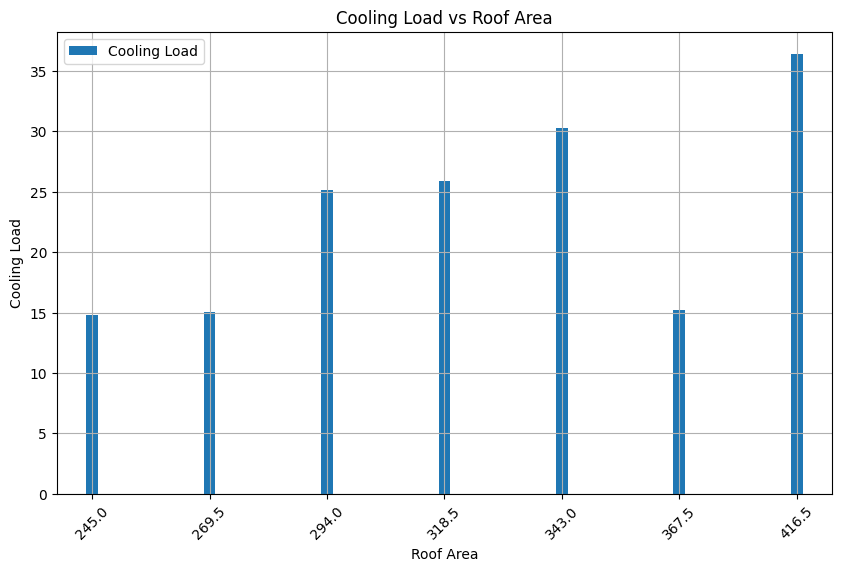

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Cooling Load', index='Wall Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6),width = 0.1)
plt.xlabel('Roof Area')
plt.ylabel('Cooling Load')
plt.title('Cooling Load vs Roof Area')
plt.xticks(rotation=45) 
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/Cooling_load_roof_area.pdf")

plt.show() 


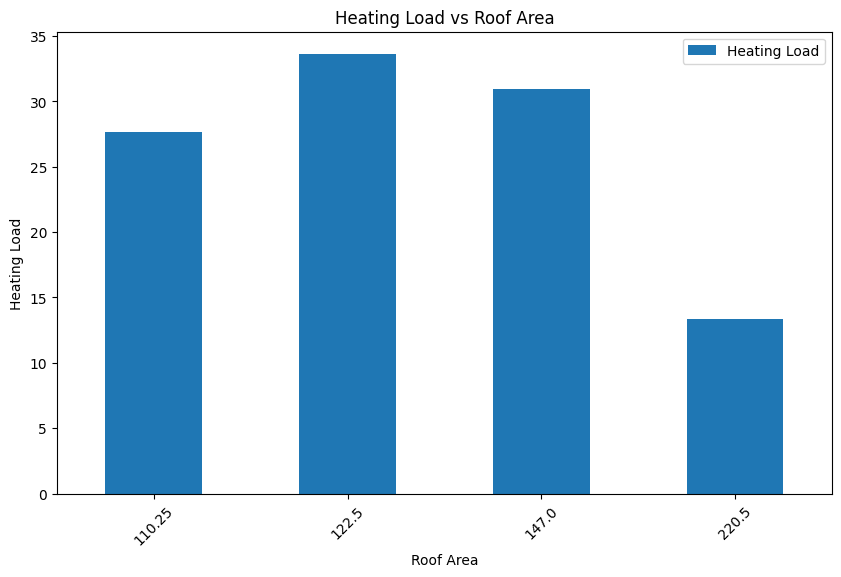

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a pivot table
pivot_table = data.pivot_table(values='Heating Load', index='Roof Area')
pivot_table
# Plotting Heating Load vs Roof Area
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Roof Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs Roof Area')
plt.xticks(rotation=45)
plt.show() 


# PCA

In [104]:
data = df

In [105]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named 'data'
# # Extracting features (independent variables)
# features = data.drop(['Heating Load', 'Cooling Load'], axis=1)

# # Applying PCA
# pca = PCA()
# pca.fit(features)

# # Plotting the variance explained by each principal component
# plt.figure(figsize=(8, 6))
# plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
# plt.xlabel('Principal Components')
# plt.ylabel('Variance Explained Ratio')
# plt.title('Variance Explained by Each Principal Component')
# plt.show()


In [106]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named 'data'
# # Extracting features (independent variables)
# features = data.drop(['Heating Load', 'Cooling Load'], axis=1)

# # Applying PCA
# pca = PCA()
# pca.fit(features)

# # Calculating cumulative explained variance ratio
# cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# # Plotting the cumulative explained variance ratio
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Variance Explained Ratio')
# plt.title('Cumulative Variance Explained by Principal Components')
# plt.grid(True)
# plt.show()


In [107]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named 'data'
# # Extracting features (independent variables)
# features = data.drop(['Heating Load', 'Cooling Load'], axis=1)

# # Applying PCA
# pca = PCA()
# pca.fit(features)

# # Plotting the explained variance ratio for each principal component as a line plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
# plt.xlabel('Principal Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio of Each Principal Component')
# plt.grid(True)
# plt.show()


In [156]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [157]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


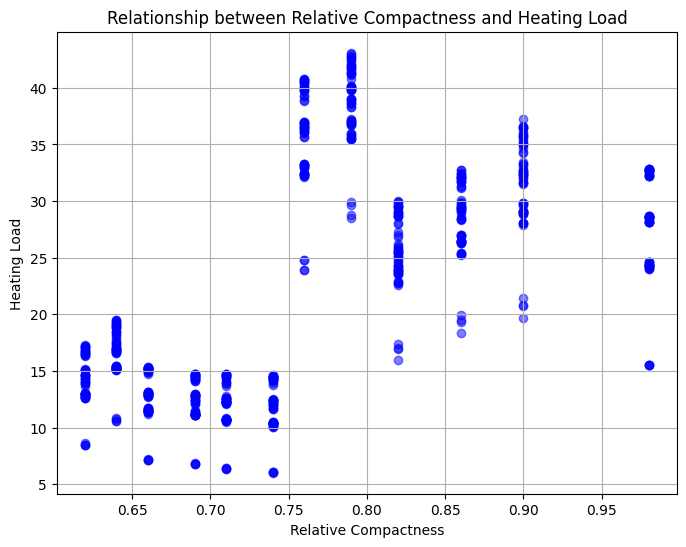

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Plotting 'Relative Compactness' against 'Heating Load'
plt.figure(figsize=(8, 6))
plt.scatter(df['Relative Compactness'], df['Heating Load'], color='blue', alpha=0.5)
plt.title('Relationship between Relative Compactness and Heating Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.grid(True)
plt.show()


In [166]:
len(data)

768

In [165]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Extracting features (independent variables) and target columns
features = data.drop(['Heating Load', 'Cooling Load'], axis=1)  # Extracting features
targets = data[['Heating Load', 'Cooling Load']]  # Extracting target columns

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

# Choose the number of components based on explained variance
num_components_to_keep = 5  # Adjust this based on your preference and the explained variance

# Keep the selected number of principal components
X_reduced = X_pca[:, :num_components_to_keep]

# Convert the reduced components back to a DataFrame if needed
X_reduced_df = pd.DataFrame(data=X_reduced, index=data.index, columns=[f'PC{i+1}' for i in range(num_components_to_keep)])

# Concatenate reduced components with target columns
reduced_df_with_targets = pd.concat([X_reduced_df, targets], axis=1)


Cumulative Explained Variance:
[0.46286741 0.61784882 0.76946935 0.89446935 0.99284882 0.99944306
 1.         1.        ]


# PCA prediction

In [160]:
#X_standardized

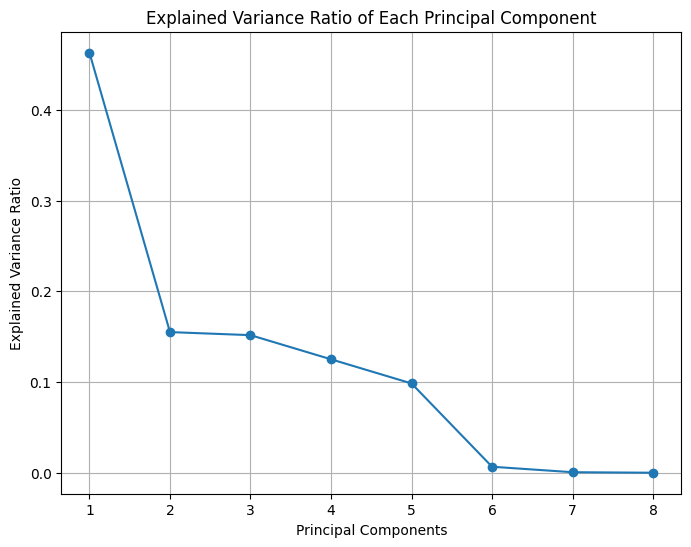

In [161]:
import matplotlib.pyplot as plt

# Plotting the explained variance ratio for each principal component as a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.grid(True)
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/principal_component_varience.pdf")
plt.show()


In [162]:
reduced_df_with_targets

,PC1,PC2,PC3,PC4,PC5,Heating Load,Cooling Load
0,3.128954,-0.902373,2.527922,1.341641,-0.038274,15.55,21.33
1,3.128954,-0.902373,2.527922,0.447214,-0.038274,15.55,21.33
2,3.128954,-0.902373,2.527922,-0.447214,-0.038274,15.55,21.33
3,3.128954,-0.902373,2.527922,-1.341641,-0.038274,15.55,21.33
4,2.355562,-0.141667,2.527922,1.341641,-0.038274,20.84,28.28
...,...,...,...,...,...,...,...
763,-2.191623,0.674563,-1.877641,-1.341641,0.118290,17.88,21.40
764,-2.406826,1.287857,-1.877641,1.341641,0.118290,16.54,16.88
765,-2.406826,1.287857,-1.877641,0.447214,0.118290,16.44,17.11
766,-2.406826,1.287857,-1.877641,-0.447214,0.118290,16.48,16.61


In [115]:
# fit linear regression after pca

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'X_reduced_df' contains the principal components (PC1, PC2, PC3, PC4)
X = reduced_df_with_targets[['PC1', 'PC2', 'PC3', 'PC4',"PC5"]]
y = reduced_df_with_targets['Heating Load']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict 'Heating Load' for test data
predictions = model.predict(X_test)

# Assess model performance on test data (e.g., calculate R-squared)
r2 = r2_score(y_test, predictions)
print(f"R-squared on Test Data: {r2}")


R-squared on Test Data: 0.8700676331498114


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming 'X_reduced_df' contains the principal components (PC1, PC2, PC3, PC4, PC5)
X = reduced_df_with_targets[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
y = reduced_df_with_targets['Heating Load']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict 'Heating Load' for test data
rf_predictions = rf_model.predict(X_test)

# Assess model performance on test data (e.g., calculate R-squared)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"R-squared on Test Data (Random Forest): {rf_r2}")


R-squared on Test Data (Random Forest): 0.9974321315805509


# Kneighbours regressor

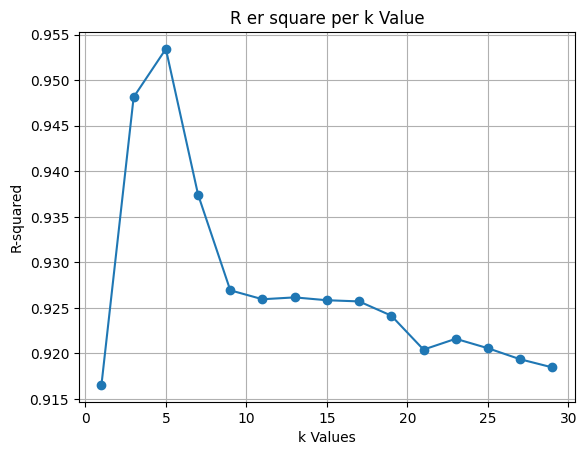

    k Values  R-squared
0          1   0.916548
1          3   0.948134
2          5   0.953425
3          7   0.937435
4          9   0.926933
5         11   0.925951
6         13   0.926155
7         15   0.925842
8         17   0.925714
9         19   0.924149
10        21   0.920424
11        23   0.921612
12        25   0.920575
13        27   0.919365
14        29   0.918469


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize lists to store k values and corresponding R-squared values
k_values = []
r2_values = []

# Iterate over different values of k
for k in range(1, 31, 2):
    # Initialize the kNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model and store the R-squared value
    r2 = r2_score(y_test, y_pred)
    k_values.append(k)
    r2_values.append(r2)

# Plotting accuracy per k 
plt.plot(k_values, r2_values, marker='o')
plt.xlabel('k Values')
plt.ylabel('R-squared')
plt.title('R er square per k Value')
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/k_neighbour_regressor_rsquare_per_k.pdf")
plt.show()

# Creating a DataFrame of k values and R-squared values

result_df = pd.DataFrame({'k Values': k_values, 'R-squared': r2_values})
print(result_df)


In [118]:
result_df

,k Values,R-squared
0,1,0.916548
1,3,0.948134
2,5,0.953425
3,7,0.937435
4,9,0.926933
5,11,0.925951
6,13,0.926155
7,15,0.925842
8,17,0.925714
9,19,0.924149


# Linear regression

R-squared: 0.9121987467347555


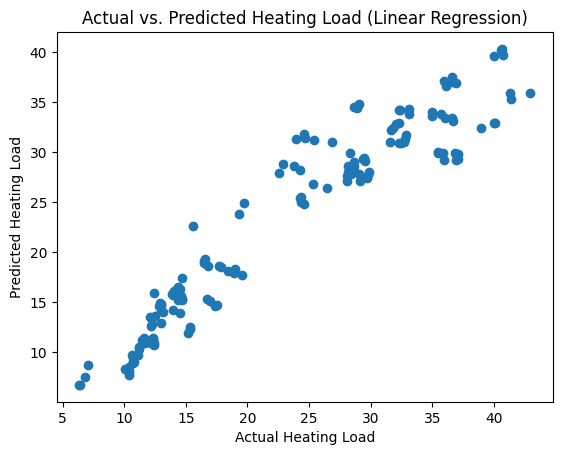

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Heating Load") 
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load (Linear Regression)")
#plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/linear_regression.pdf")
plt.show() 

In [120]:
df = data

R-squared: 0.9121987467347555
RMSE: 3.025183658193502
MAE: 2.182512239485149


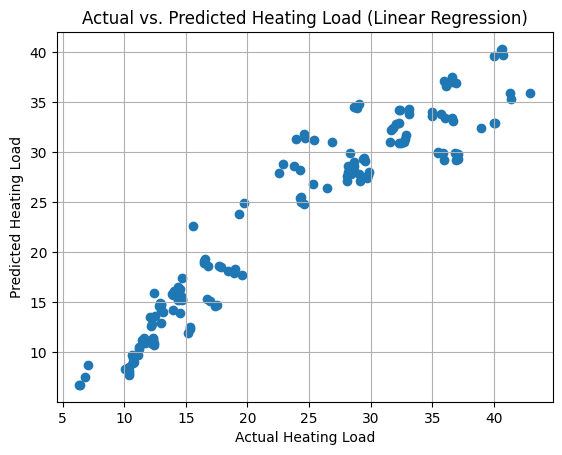

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Heating Load") 
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load (Linear Regression)")
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/linear_regression.pdf")
plt.show()


R-squared: 0.9121987467347555


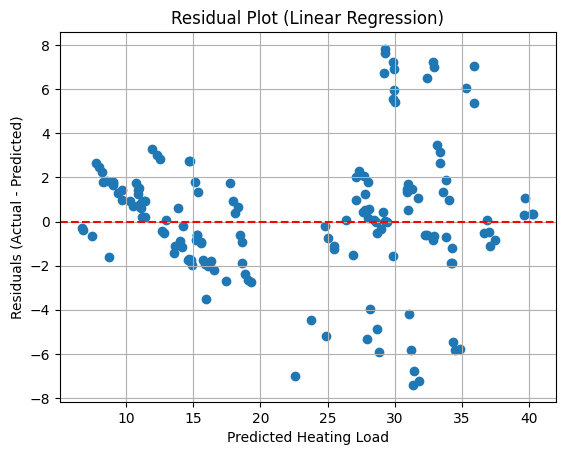

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plotting residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Heating Load")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Linear Regression)")
plt.grid()
plt.show()


# Random Forest regression

R-squared: 0.9976889803753333


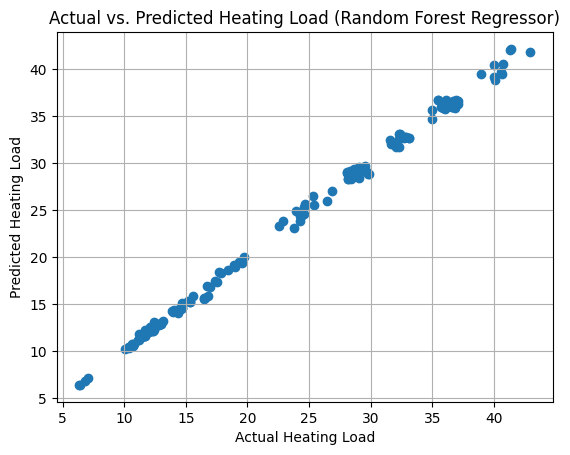

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2) 

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Heating Load") 
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load (Random Forest Regressor)")
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/random_forest.pdf")
plt.show()


R-squared: 0.9974546237181696


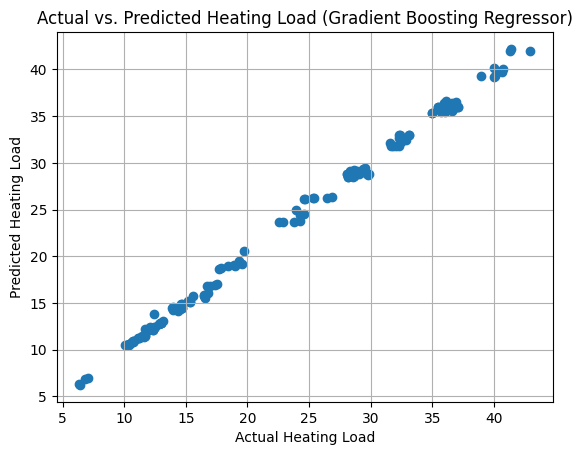

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gradient_boosting_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Heating Load") 
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load (Gradient Boosting Regressor)")
plt.grid()
plt.show()


In [125]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if needed
numeric_data = data.drop(['Orientation', 'Glazing Area Distribution'], axis=1)

# Standardize the data for Factor Analysis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform Factor Analysis
n_factors = 3  # Number of factors to extract
factor_analysis = FactorAnalysis(n_components=n_factors)
factor_scores = factor_analysis.fit_transform(scaled_data)

# Display factor loadings
factor_loadings = pd.DataFrame(factor_analysis.components_, columns=numeric_data.columns)
print("Factor Loadings:")
print(factor_loadings)

# Display factor scores for each observation
factor_scores_df = pd.DataFrame(factor_scores, columns=[f"Factor_{i+1}" for i in range(n_factors)])
print("\nFactor Scores:")
print(factor_scores_df)


Factor Loadings:
   Relative Compactness  Surface Area     Wall Area     Roof Area  \
0              0.941116 -9.519067e-01  1.143765e-01 -9.834799e-01   
1             -0.313481  3.063881e-01  9.934375e-01 -1.810174e-01   
2              0.056431 -1.809067e-11  2.465256e-11 -2.954694e-11   

   Overall Height  Glazing Area  Heating Load  Cooling Load  
0        0.957072  1.616132e-11      0.809025      0.815176  
1        0.172642  1.793101e-11      0.365537      0.336086  
2       -0.118619 -5.663227e-01     -0.450627     -0.429628  

Factor Scores:
     Factor_1  Factor_2  Factor_3
0    1.633501 -0.753732  3.594108
1    1.633501 -0.753732  3.594108
2    1.633501 -0.753732  3.594108
3    1.633501 -0.753732  3.594108
4    1.245200 -0.143362  2.169894
..        ...       ...       ...
763 -1.116625  0.694223 -0.504183
764 -1.222994  1.272133  0.170026
765 -1.222994  1.272133  0.177738
766 -1.222994  1.272133  0.190940
767 -1.222994  1.272133  0.187062

[768 rows x 3 columns]


# Cooling load

R-squared: 0.8931972456590836
RMSE: 3.1457984846368516
MAE: 2.195399539011747


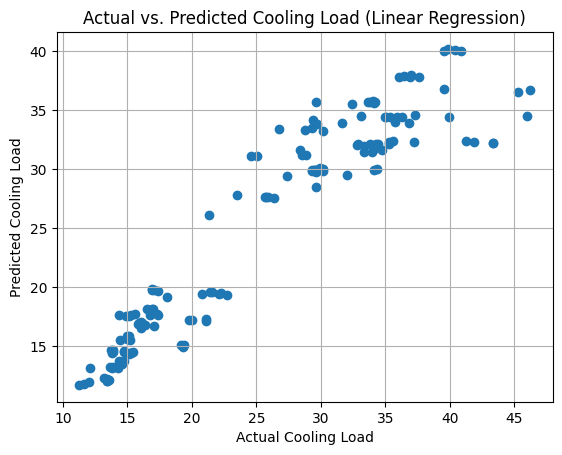

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Cooling Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Cooling Load") 
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs. Predicted Cooling Load (Linear Regression)")
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_linear_regression.pdf")
plt.show()


# Random Forest for cooling load

R-squared: 0.9683338660414131
RMSE: 1.7129204519023806
MAE: 1.0604350649350647


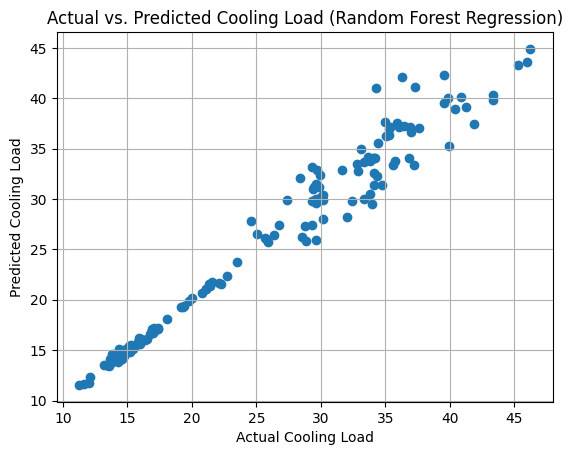

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Cooling Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Cooling Load") 
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs. Predicted Cooling Load (Random Forest Regression)")
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_random_forest.pdf")
plt.show()


# Random forest for heating load

In [129]:
df = data

R-squared: 0.9976889803753333
RMSE: 0.49079847532018817
MAE: 0.35467402597402614


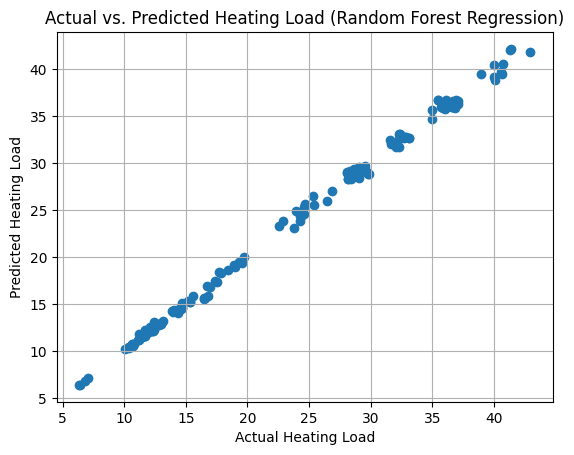

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Heating Load']  # Replace 'Cooling Load' with 'Heating Load'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Heating Load") 
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load (Random Forest Regression)")
plt.grid() 
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/heating_random_forest.pdf")
plt.show()


# Feature Engeeneering

In [131]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [132]:
feature = df.copy()

In [133]:
feature

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [134]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your actual DataFrame

# Function to categorize Roof_Area
def categorize_roof_area(area):
    if area > 200:
        return "Relatively Larger"
    elif 120 <= area <= 200:
        return "Moderate"
    else:
        return "Relatively Small"

# Creating the new column 'Roof_Area_Type'
feature['Roof_Area_Type'] = feature['Roof Area'].apply(categorize_roof_area)

# Displaying the DataFrame with the new column
feature


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Roof_Area_Type
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,Relatively Small
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,Relatively Small
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,Relatively Small
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,Relatively Small
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,Relatively Larger
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,Relatively Larger
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,Relatively Larger
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,Relatively Larger


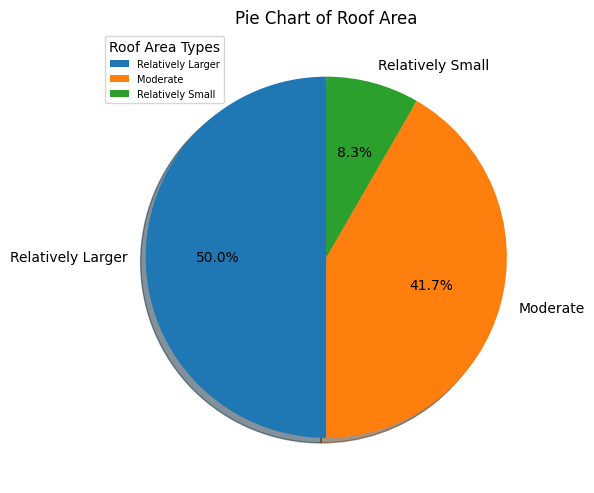

In [135]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Roof Area" is the column you're interested in
unique_values = feature["Roof_Area_Type"].value_counts()
labels = unique_values.index
sizes = unique_values.values

# Plotting a pie chart with legend
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Pie Chart of Roof Area')
plt.legend(title='Roof Area Types', loc='upper left',prop={"size":7})  # Adding legend with title
plt.tight_layout()

# Save the plot as PDF
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/roof_area_type_pie_with_legend.pdf")

plt.show()



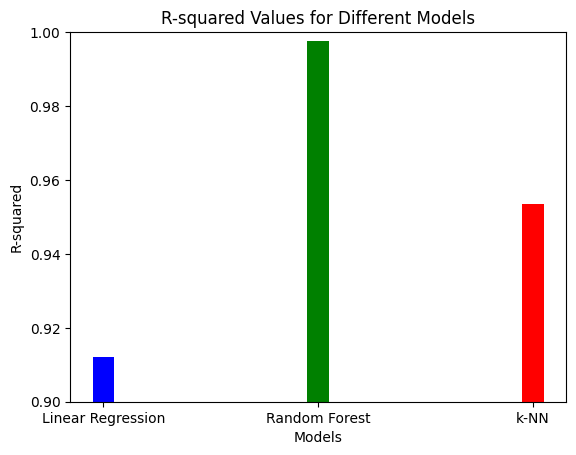

In [138]:
import matplotlib.pyplot as plt

# R-squared values for the three models
models = ['Linear Regression', 'Random Forest', 'k-NN']
r2_values = [0.9122, 0.9977, 0.9534]

# Create a bar plot
plt.bar(models, r2_values, color=['blue', 'green', 'red'],width = 0.1)
plt.ylim(0.9, 1.0)  # Set the y-axis limit for better visualization
plt.title('R-squared Values for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()


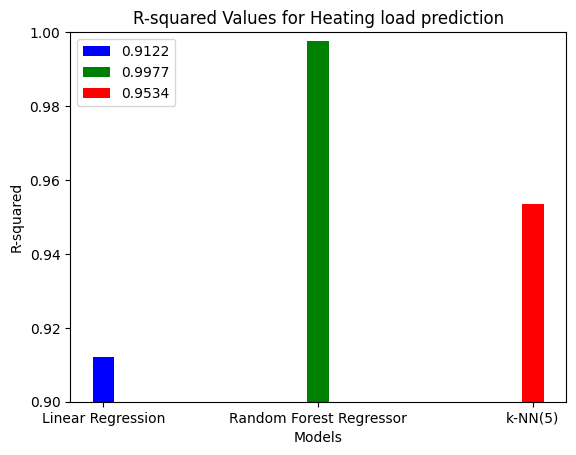

In [176]:
import matplotlib.pyplot as plt

# R-squared values for the three models
models = ['Linear Regression', 'Random Forest Regressor', 'k-NN(5)']
r2_values = [0.9122, 0.9977, 0.9534]

# Create a bar plot
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red'], width=0.1)
plt.ylim(0.9, 1.0)  # Set the y-axis limit for better visualization
plt.title('R-squared Values for Heating load prediction')
plt.xlabel('Models')
plt.ylabel('R-squared')

# Add R-squared values in the legend
for bar, value in zip(bars, r2_values):
    bar.set_label(f'{value:.4f}')

# Show the legend
plt.legend(loc='upper left')
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/model_acccuracy_heating_load.png") 
plt.show()


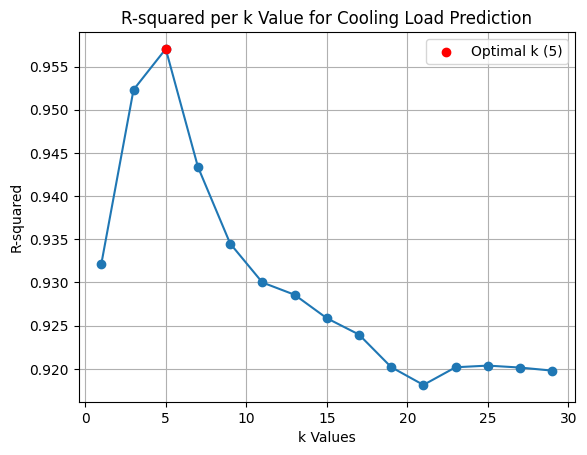

    k Values  R-squared
0          1   0.932146
1          3   0.952315
2          5   0.957044
3          7   0.943378
4          9   0.934505
5         11   0.929997
6         13   0.928575
7         15   0.925860
8         17   0.923965
9         19   0.920193
10        21   0.918132
11        23   0.920176
12        25   0.920369
13        27   0.920143
14        29   0.919787


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Cooling Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize lists to store k values and corresponding R-squared values
k_values = []
r2_values = []

# Iterate over different values of k
for k in range(1, 31, 2):
    # Initialize the kNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model and store the R-squared value
    r2 = r2_score(y_test, y_pred)
    k_values.append(k)
    r2_values.append(r2)

# Find the optimal k value based on the maximum R-squared
optimal_k = k_values[r2_values.index(max(r2_values))]

# Plotting accuracy per k
plt.plot(k_values, r2_values, marker='o')
plt.scatter(optimal_k, max(r2_values), color='red', label=f'Optimal k ({optimal_k})', zorder=5)
plt.xlabel('k Values')
plt.ylabel('R-squared')
plt.title('R-squared per k Value for Cooling Load Prediction')
plt.legend()
plt.grid()
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_k_neighbour_regressor_rsquare_per_k.pdf")
plt.show()

# Creating a DataFrame of k values and R-squared values
result_df = pd.DataFrame({'k Values': k_values, 'R-squared': r2_values})
print(result_df)


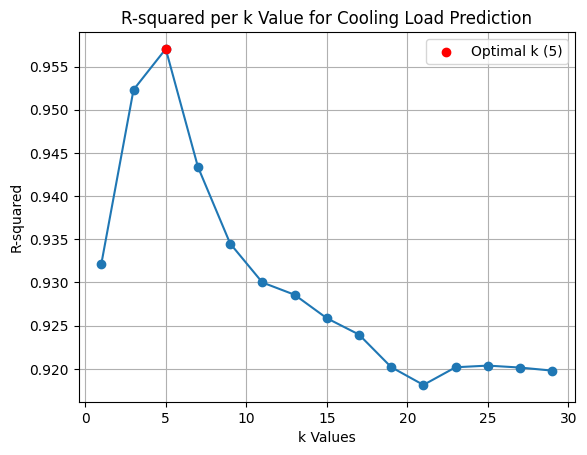

    k Values  R-squared
0          1   0.932146
1          3   0.952315
2          5   0.957044
3          7   0.943378
4          9   0.934505
5         11   0.929997
6         13   0.928575
7         15   0.925860
8         17   0.923965
9         19   0.920193
10        21   0.918132
11        23   0.920176
12        25   0.920369
13        27   0.920143
14        29   0.919787


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting features and target variable
features = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
target = df['Cooling Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize lists to store k values and corresponding R-squared values
k_values = []
r2_values = []

# Iterate over different values of k
for k in range(1, 31, 2):
    # Initialize the kNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model and store the R-squared value
    r2 = r2_score(y_test, y_pred)
    k_values.append(k)
    r2_values.append(r2)

# Find the optimal k value based on the maximum R-squared
optimal_k = k_values[r2_values.index(max(r2_values))]

# Plotting accuracy per k
plt.plot(k_values, r2_values, marker='o')
plt.scatter(optimal_k, max(r2_values), color='red', label=f'Optimal k ({optimal_k})', zorder=5)
plt.xlabel('k Values')
plt.ylabel('R-squared')
plt.title('R-squared per k Value for Cooling Load Prediction')
plt.legend()
plt.grid()
#plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_k_neighbour_regressor_rsquare_per_k.pdf")
plt.show()

# Creating a DataFrame of k values and R-squared values
result_df = pd.DataFrame({'k Values': k_values, 'R-squared': r2_values})
print(result_df)


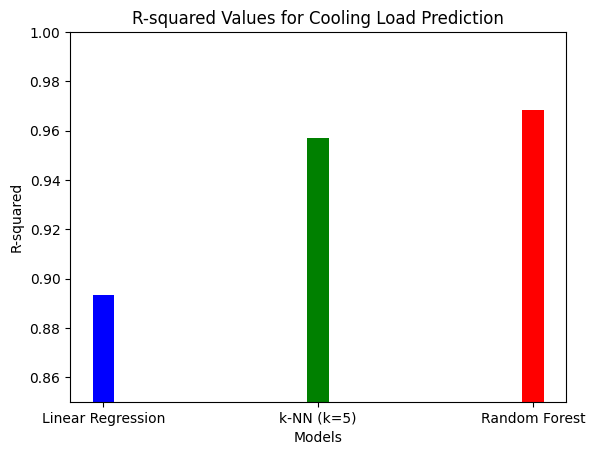

In [147]:
import matplotlib.pyplot as plt

# Models and their corresponding R-squared values
models = ['Linear Regression', 'k-NN (k=5)', 'Random Forest']
r2_values = [0.8932, 0.9570, 0.9683]

# Create a bar plot
plt.bar(models, r2_values, color=['blue', 'green', 'red'] , width = 0.1)
plt.ylim(0.85, 1.0)  # Set the y-axis limit for better visualization
plt.title('R-squared Values for Cooling Load Prediction')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()


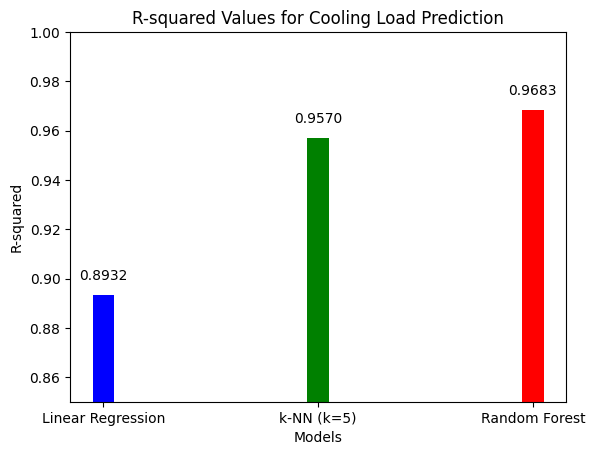

In [155]:
import matplotlib.pyplot as plt

# Models and their corresponding R-squared values
models = ['Linear Regression', 'k-NN (k=5)', 'Random Forest']
r2_values = [0.8932, 0.9570, 0.9683]

# Create a bar plot
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red'], width=0.1)
plt.ylim(0.85, 1.0)  # Set the y-axis limit for better visualization
plt.title('R-squared Values for Cooling Load Prediction')
plt.xlabel('Models')
plt.ylabel('R-squared')

# Add a legend with R-squared values
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{value:.4f}', ha='center', va='bottom')

#plt.legend(title='R-squared', loc='upper left')
plt.savefig("/home/sysadm/Desktop/Econometrices/energy_efficiency/cooling_load_model_r_2_value.png")
plt.show()


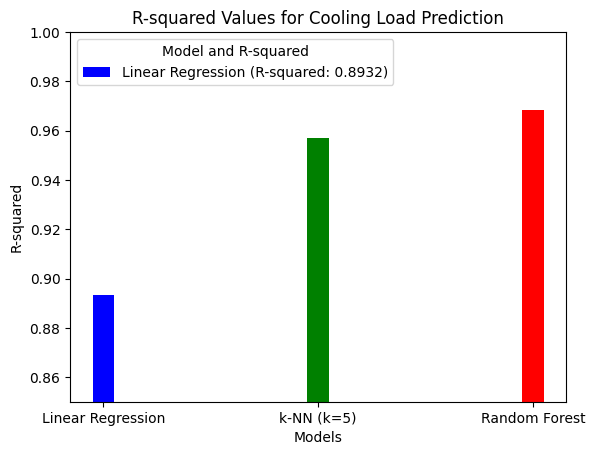

In [153]:
import matplotlib.pyplot as plt

# Models and their corresponding R-squared values
models = ['Linear Regression', 'k-NN (k=5)', 'Random Forest']
r2_values = [0.8932, 0.9570, 0.9683]

# Create a bar plot
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red'], width=0.1)
plt.ylim(0.85, 1.0)  # Set the y-axis limit for better visualization
plt.title('R-squared Values for Cooling Load Prediction')
plt.xlabel('Models')
plt.ylabel('R-squared')

# Add a legend with R-squared values
legend_labels = [f'{model} (R-squared: {value:.4f})' for model, value in zip(models, r2_values)]
plt.legend(legend_labels, title='Model and R-squared', loc='upper left')

# Display the plot
plt.show()
